# **ClusterAI 2020**
# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521

## Grupo 2
### Integrantes :
#### - Facundo Iorfida
#### - Tomás Revah
#### - Agustín Varetti

# Precios de terrenos

Datasets principales:
  - **Precio de Terrenos 2014**
      [link dataset](https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/archivo/juqdkmgo-20827-resource-xlsx)
  - **Precio de Terrenos 2015**
      [link dataset](https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/archivo/juqdkmgo-20829-resource-xlsx)
  - **Precio de Terrenos 2016**
      [link dataset](https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/archivo/juqdkmgo-20831-resource-xlsx)
  - **Precio de Terrenos 2017**
      [link dataset](https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/archivo/juqdkmgo-20833-resource-xlsx)
  - **Precio de Terrenos 2018**
      [link dataset](https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/archivo/juqdkmgo-20835-resource-xlsx)
      
Datasets adicionales:
  - **Establecimientos educativos**
      [link dataset](https://data.buenosaires.gob.ar/dataset/establecimientos-educativos/archivo/07a625bc-3456-4af8-b53f-97ebeb96f232)
  - **Espacios verdes publicos**
      [link dataset](https://data.buenosaires.gob.ar/dataset/espacios-verdes/archivo/juqdkmgo-967-resource-xlsx)
  - **Oferta gastronomica**
      [link dataset](https://data.buenosaires.gob.ar/dataset/oferta-establecimientos-gastronomicos/archivo/e66613ef-aaf4-44aa-b89c-638c431fef0e-xlsx)
  - **Espacios culturales**
      [link dataset](https://data.buenosaires.gob.ar/dataset/espacios-culturales/archivo/juqdkmgo-711-resource-xlsx)
  - **Delitos**
      [link dataset](https://data.buenosaires.gob.ar/dataset/delitos)
  - **Estaciones de Bicicletas**
      [link dataset](https://data.buenosaires.gob.ar/dataset/estaciones-bicicletas-publicas/archivo/1d21a28a-bb2b-4ddb-b00b-77f82f3e34fb)
  - **Bocas de acceso al subterraneo**
      [link dataset](https://data.buenosaires.gob.ar/dataset/bocas-subte/archivo/c9b9628b-6ca5-4867-bf9d-ad11997f951f-xlsx)

## 0) Ask an interesting question

* ¿Qué variables que se tienen en cuenta a la hora de poner precio a un Terreno en CABA?
* ¿Es posible predecir el precio de una propiedad a partir de conocer determinadas características como : ubicación, m2 totales, altura de calle,  barrio, comuna, código postal?
* Y respecto a variables no tenidas en cuenta en primer lugar (como las mencionadas anteriormente), ¿cuánto impactan e influyen el precio : cantidad de establecimientos educativos, espacios verdes públicos, oferta gastronómica, espacios culturales, delitos o arbolado público; cada una de ellas considerada por barrio de la Ciudad de Buenos Aires.
* ¿Hay alguna de las variables mencionadas arriba que no influyen en la determinación del precio?
* ¿Es posible detectar un terreno a buen precio, comparando el valor real vs el valor predecido a partir de las distintas características?

## 1) Get the data

**Importamos las Librerías necesarias:**

Utilizaremos Numpy para realizar calculos matriciales, pandas para manejar los datos y almacenarlos, y matplotlib junto con Seaborn para visualizar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#previo a trabajar con las bases de datos, nos conectamos con Google Drive que es donde estaran ubicadas.
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


**Read .csv**

Descargamos de https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta los datasets "Precio de Terrenos" correspondiente al período 2010-2018. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido.

Una vez leido guardamos las tablas como un DataFrame de Pandas en los elementos "terreno_año".

In [ ]:
terreno_2014=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/precio-de-terrenos-2014.xlsx')
terreno_2015=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/precio-de-terrenos-2015.xlsx')
terreno_2016=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/precio-de-terrenos-2016.xlsx')
terreno_2017=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/precio-de-terrenos-2017.xlsx')
terreno_2018=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/precio-de-terrenos-2018.xlsx')

establecimientos_educativos=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/establecimientos_educativos_WGS84.xlsx')
espacios_verdes=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/espacio-verde-publico.xlsx')
oferta_gastronomica=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/oferta_gastronomica.xlsx')
espacios_culturales=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/espacios-culturales.xlsx')
delitos=pd.read_csv('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/delitos.csv')
estaciones_bici=pd.read_csv('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/nuevas-estaciones-bicicletas-publicas.csv')
accesos_subte=pd.read_excel('/content/gdrive/My Drive/Ciencia de Datos/TP Integrador/Datasets/Terrenos/Adicionales/bocas-de-subte.xlsx')

## 2) Explore the data

### 2.1) Pre-processing

Una vez cargado los datasets principales y adicionales, procederemos a preprocesarlos. Daremos tratamiento a los datos de cada uno de los datasets para su correcta utilización. Entre otras cosas se realizará :

0. Verificar la correcta carga.
1. Tratamiento de valores faltantes o (NaN).
2. Corrección de los datos mal ingresados, hecho repetido al indicar el Barrio correspondiente al registro.
3. Conversión de tipo de datos.

Para los datasets terrenos se concatenarán en uno único, y posteriormente, crearemos una tabla donde será volcada la información obtenida de los datasets "adicionales".

Finalmente, se unificará toda la información en el dataset terrenos para poder continuar con visualización de los datos.

#### Datasets : Terrenos 2014-2018

##### 0. Concatenar datasets y verificar correcta carga.

In [ ]:
#concantenamos los datasets terrenos.
terrenos=pd.concat([terreno_2014,terreno_2015,terreno_2016,terreno_2017,terreno_2018])
terrenos.reset_index(inplace = True, drop = True) 

terrenos_dim_i=np.shape(terrenos)

#utilizamos .head() para verificar la correcta carga.
terrenos.head()

,LONGITUD,LATITUD,FECHA,CALLE,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,PRECIO_$,BARRIO,COMUNA,FOT,CAMBIO,DIRECCION,CODIGO_POSTAL,CODIGO_POSTAL_ARG,PRECIO_$_M2
0,-58.4556,-34.5532,2015/02/19,11 DE SEPTIEMBRE DE 1888,2700,381.0,1150000,3018.4,NaN,BELGRANO,13,NaN,NaN,NaN,NaN,NaN,NaN
1,-58.4571,-34.5512,2015/02/13,11 DE SEPTIEMBRE DE 1888,2900,200.0,360000,1800,NaN,NUÑEZ,13,NaN,NaN,NaN,NaN,NaN,NaN
2,-58.463,-34.5432,2015/02/19,11 DE SEPTIEMBRE DE 1888,3900,493.0,1000000,2028.4,NaN,NUÑEZ,13,NaN,NaN,NaN,NaN,NaN,NaN
3,-58.4649,-34.5888,NaN,14 DE JULIO,400,400.0,270000,675,NaN,CHACARITA,15,NaN,NaN,NaN,NaN,NaN,NaN
4,-58.4649,-34.5888,2015/02/20,14 DE JULIO,400,310.0,270000,871,NaN,CHACARITA,15,NaN,NaN,NaN,NaN,NaN,NaN


##### 01. Tratamiento de valores nulos.

In [ ]:
#verificamos que las columnas no tengan NaN.
col_nulls_terrenos = terrenos.isnull().any()
col_nulls_terrenos

LONGITUD              True
LATITUD               True
FECHA                 True
CALLE                 True
NUMERO                True
M2                   False
PRECIO_USD           False
PRECIO_USD_M2        False
PRECIO_$              True
BARRIO                True
COMUNA                True
FOT                   True
CAMBIO                True
DIRECCION             True
CODIGO_POSTAL         True
CODIGO_POSTAL_ARG     True
PRECIO_$_M2           True
dtype: bool

In [ ]:
#dentro de cada columna, contamos la cantidad de estos y el % respecto a la totalidad de registros para decidir como tratarlos.

#cantidad de valores nulos ordenados descendentemente
total_nulls_terrenos = terrenos.isnull().sum().sort_values(ascending=False)
#porcetaje de lo que representa para cada columna
percent = (terrenos.isnull().sum()/terrenos.isnull().count()).sort_values(ascending=False)

#mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total_nulls_terrenos, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PRECIO_$_M2,7015,0.886180
PRECIO_$,7006,0.885043
CODIGO_POSTAL,3834,0.484336
CODIGO_POSTAL_ARG,3833,0.484209
DIRECCION,3553,0.448838
FOT,2763,0.349040
FECHA,2615,0.330344
CAMBIO,1880,0.237494
LATITUD,1800,0.227388
LONGITUD,1800,0.227388


In [ ]:
#dada la cantidad de registros nulos en algunos casos y su irrelevancia en otros, se decide eliminar las columnas :
terrenos=terrenos.drop(columns=['PRECIO_$_M2','PRECIO_$','CODIGO_POSTAL','CODIGO_POSTAL_ARG','DIRECCION','FOT','FECHA','CAMBIO'])

In [ ]:
#para las columnas que aún contienen valores NaN y no fueron eliminadas, dada su poca cantidad, se decide eliminar los registros donde haya
#por lo menos un valor nulo. Se verifica que ya no queden valores NaN.
terrenos = terrenos.dropna()
col_nulls_terrenos=terrenos.isnull().any()
col_nulls_terrenos

LONGITUD         False
LATITUD          False
CALLE            False
NUMERO           False
M2               False
PRECIO_USD       False
PRECIO_USD_M2    False
BARRIO           False
COMUNA           False
dtype: bool

In [ ]:
#finalmente, con .head() visualizo el df terrenos que finalmente obtuve y utilizando el comando np.shape conozco sus dimensiones finales.
#muestro también como recibimos inicialmente el dataset y como quedó una vez tratado.
print("El dataset terrenos, inicialmente tenía " + str(terrenos_dim_i[0]) + " filas y " + str(terrenos_dim_i[1]) + " columnas. Luego del procesamiento, quedó con " + str(np.shape(terrenos)[0]) + " filas y " + str(np.shape(terrenos)[1]) + " columnas")

El dataset terrenos, inicialmente tenía 7916 filas y 17 columnas. Luego del procesamiento, quedó con 6023 filas y 9 columnas


##### 02. Datos mal cargados.

In [ ]:
#verifico que los nombres de los barrios estén correctamente cargados.
terrenos.BARRIO.unique()

array(['BELGRANO', 'NUÑEZ', 'CHACARITA', 'CONSTITUCION', 'BALVANERA',
       'SAN CRISTOBAL', 'PARQUE PATRICIOS', 'NUEVA POMPEYA', 'VILLA LURO',
       'LINIERS', 'VILLA CRESPO', 'VILLA ORTUZAR', 'VILLA URQUIZA',
       'SAAVEDRA', 'CABALLITO', 'ALMAGRO', 'PALERMO', 'MONTE CASTRO',
       'MATADEROS', 'PARQUE CHACABUCO', 'FLORES', 'VELEZ SARSFIELD',
       'BARRACAS', 'MONTSERRAT', 'VILLA DEL PARQUE', 'VILLA GRAL. MITRE',
       'COLEGIALES', 'RECOLETA', 'BOEDO', 'PARQUE AVELLANEDA',
       'PARQUE CHAS', 'RETIRO', 'FLORESTA', 'VILLA LUGANO',
       'VILLA SANTA RITA', 'AGRONOMIA', 'VILLA PUEYRREDON',
       'VILLA DEVOTO', 'PATERNAL', 'COGHLAN', 'VERSALLES',
       'VILLA SOLDATI', 'BOCA', 'SAN TELMO', 'SAN NICOLAS', 'VILLA REAL',
       'PUERTO MADERO', 'VILLA RIACHUELO', 'MONSERRAT', 'NUÃ‘EZ',
       'NUâ”œÃ¦EZ'], dtype=object)

In [ ]:
#realizo el reemplazo del nombre mal cargado, por el correcto.
terrenos.BARRIO = terrenos.BARRIO.replace({"MONTSERRAT": "MONSERRAT","NUâ”œÃ¦EZ":"NUÑEZ","NUÃ‘EZ":"NUÑEZ"})
terrenos.BARRIO.unique()

array(['BELGRANO', 'NUÑEZ', 'CHACARITA', 'CONSTITUCION', 'BALVANERA',
       'SAN CRISTOBAL', 'PARQUE PATRICIOS', 'NUEVA POMPEYA', 'VILLA LURO',
       'LINIERS', 'VILLA CRESPO', 'VILLA ORTUZAR', 'VILLA URQUIZA',
       'SAAVEDRA', 'CABALLITO', 'ALMAGRO', 'PALERMO', 'MONTE CASTRO',
       'MATADEROS', 'PARQUE CHACABUCO', 'FLORES', 'VELEZ SARSFIELD',
       'BARRACAS', 'MONSERRAT', 'VILLA DEL PARQUE', 'VILLA GRAL. MITRE',
       'COLEGIALES', 'RECOLETA', 'BOEDO', 'PARQUE AVELLANEDA',
       'PARQUE CHAS', 'RETIRO', 'FLORESTA', 'VILLA LUGANO',
       'VILLA SANTA RITA', 'AGRONOMIA', 'VILLA PUEYRREDON',
       'VILLA DEVOTO', 'PATERNAL', 'COGHLAN', 'VERSALLES',
       'VILLA SOLDATI', 'BOCA', 'SAN TELMO', 'SAN NICOLAS', 'VILLA REAL',
       'PUERTO MADERO', 'VILLA RIACHUELO'], dtype=object)

In [ ]:
#realizo lo mismo con COMUNA, pero lo que sucede acá, no es que está mal cargado, si no que de diferente manera.
terrenos.COMUNA.unique()

array([13, 15, 1, 3, 4, 10, 9, 12, 6, 5, 14, 7, 11, 2, 8, 'COMUNA 15',
       'COMUNA 3', 'COMUNA 9', 'COMUNA 12', 'COMUNA 8', 'COMUNA 6',
       'COMUNA 5', 'COMUNA 4', 'COMUNA 7', 'COMUNA 10', 'COMUNA 1',
       'COMUNA 11', 'COMUNA 14', 'COMUNA 2', 'COMUNA 13'], dtype=object)

In [ ]:
#realizo los reemplazos correspondientes y verifico que se haya realizado de manera correcta.
terrenos.COMUNA = terrenos.COMUNA.replace({1:"COMUNA  1", "COMUNA 1":"COMUNA  1",
                                           2:"COMUNA  2", "COMUNA 2":"COMUNA  2",
                                           3:"COMUNA  3", "COMUNA 3":"COMUNA  3",
                                           4:"COMUNA  4", "COMUNA 4":"COMUNA  4",
                                           5:"COMUNA  5", "COMUNA 5":"COMUNA  5",
                                           6:"COMUNA  6", "COMUNA 6":"COMUNA  6",
                                           7:"COMUNA  7", "COMUNA 7":"COMUNA  7",
                                           8:"COMUNA  8", "COMUNA 8":"COMUNA  8",
                                           9:"COMUNA  9", "COMUNA 9":"COMUNA  9",
                                           10:"COMUNA 10",
                                           11:"COMUNA 11",
                                           12:"COMUNA 12",
                                           13:"COMUNA 13",
                                           14:"COMUNA 14",
                                           15:"COMUNA 15"})

terrenos.COMUNA.unique()

array(['COMUNA 13', 'COMUNA 15', 'COMUNA  1', 'COMUNA  3', 'COMUNA  4',
       'COMUNA 10', 'COMUNA  9', 'COMUNA 12', 'COMUNA  6', 'COMUNA  5',
       'COMUNA 14', 'COMUNA  7', 'COMUNA 11', 'COMUNA  2', 'COMUNA  8'],
      dtype=object)

##### 03. Tipos de datos

In [ ]:
terrenos.dtypes

LONGITUD          object
LATITUD           object
CALLE             object
NUMERO            object
M2               float64
PRECIO_USD         int64
PRECIO_USD_M2     object
BARRIO            object
COMUNA            object
dtype: object

In [ ]:
terrenos.PRECIO_USD = terrenos.PRECIO_USD.astype(float)
terrenos.dtypes

LONGITUD          object
LATITUD           object
CALLE             object
NUMERO            object
M2               float64
PRECIO_USD       float64
PRECIO_USD_M2     object
BARRIO            object
COMUNA            object
dtype: object

In [ ]:
terrenos.PRECIO_USD_M2 = terrenos.PRECIO_USD / terrenos.M2

In [ ]:
terrenos.drop(terrenos.loc[terrenos['NUMERO']=='PAZ, GRAL. AV.'].index, inplace=True)

In [ ]:
terrenos.NUMERO = terrenos.NUMERO.astype(int)

In [ ]:
terrenos.drop(terrenos.loc[terrenos['LONGITUD']==' '].index, inplace=True)
terrenos['LONGITUD'] = pd.to_numeric(terrenos['LONGITUD'])
terrenos['LATITUD'] = pd.to_numeric(terrenos['LATITUD'])
terrenos.dtypes

LONGITUD         float64
LATITUD          float64
CALLE             object
NUMERO             int64
M2               float64
PRECIO_USD       float64
PRECIO_USD_M2    float64
BARRIO            object
COMUNA            object
dtype: object

In [ ]:
terrenos.reset_index(inplace = True, drop = True) 
terrenos

,LONGITUD,LATITUD,CALLE,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,BARRIO,COMUNA
0,-58.455627,-34.553169,11 DE SEPTIEMBRE DE 1888,2700,381.0,1150000.0,3018.372703,BELGRANO,COMUNA 13
1,-58.457136,-34.551182,11 DE SEPTIEMBRE DE 1888,2900,200.0,360000.0,1800.000000,NUÑEZ,COMUNA 13
2,-58.462965,-34.543213,11 DE SEPTIEMBRE DE 1888,3900,493.0,1000000.0,2028.397566,NUÑEZ,COMUNA 13
3,-58.464855,-34.588766,14 DE JULIO,400,400.0,270000.0,675.000000,CHACARITA,COMUNA 15
4,-58.464855,-34.588766,14 DE JULIO,400,310.0,270000.0,870.967742,CHACARITA,COMUNA 15
...,...,...,...,...,...,...,...,...,...
6016,-58.525625,-34.614169,Av Beiro,5319,366.0,780000.0,2131.147541,VILLA REAL,COMUNA 10
6017,-58.525629,-34.641675,IBARROLA,7054,176.0,320000.0,1818.181818,LINIERS,COMUNA 9
6018,-58.525629,-34.641675,IBARROLA,7000,444.0,1000000.0,2252.252252,LINIERS,COMUNA 9
6019,-58.527379,-34.636215,Amadeo Jacques,6900,558.0,395000.0,707.885305,LINIERS,COMUNA 9


#### Datasets adicionales

In [ ]:
establecimientos_educativos.barrio=establecimientos_educativos.barrio.replace({"SAN NIICOLAS":"SAN NICOLAS",
                                                                               "MONTSERRAT":"MONSERRAT"})

est_ed_barrio=pd.DataFrame(establecimientos_educativos.barrio.value_counts())
est_ed_barrio=est_ed_barrio.rename(columns={'barrio':'EST_EDU'})
est_ed_barrio.shape

(48, 1)

In [ ]:
espacios_verdes.BARRIO=espacios_verdes.BARRIO.replace({"BALBANERA":"BALVANERA",
                                                       "VÉLEZ SÁRSFIELD":"VELEZ SARSFIELD"})

esp_verd_barrio=pd.DataFrame(espacios_verdes.BARRIO.value_counts())
esp_verd_barrio=esp_verd_barrio.rename(columns={'BARRIO':'ESP_VERD'})
esp_verd_barrio.shape

(48, 1)

In [ ]:
for i in range(oferta_gastronomica.barrio.count()):
    oferta_gastronomica.barrio[i] = oferta_gastronomica.barrio[i].upper()

oferta_gastronomica.barrio=oferta_gastronomica.barrio.replace({"NUÃƑÂ±EZ":"NUÑEZ"})

of_gastr_barrio = pd.DataFrame(oferta_gastronomica.barrio.value_counts())
of_gastr_barrio = of_gastr_barrio.rename(columns={'barrio':'OF_GASTR'})
of_gastr_barrio.shape

(47, 1)

In [ ]:
esp_cult_barrio = pd.DataFrame(espacios_culturales.barrio.value_counts())
esp_cult_barrio = esp_cult_barrio.rename(columns={'barrio':'ESP_CULT'})
esp_cult_barrio.shape

(48, 1)

In [ ]:
delitos.barrio.fillna(value='A',axis=0,inplace=True)
delitos.barrio = delitos.barrio.replace({"San Nicolás":"San Nicolas",
                                         "Constitución":"Constitucion",
                                         "San Cristóbal":"San Cristobal",
                                         "Villa Pueyrredón":"Villa Pueyrredon",
                                         "Vélez Sársfield":"Velez Sarsfield",
                                         "Agronomía":"Agronomia"})
for i in range(delitos.barrio.count()):
    delitos.barrio[i] = delitos.barrio[i].upper()
delitos.drop(delitos.loc[delitos['barrio']=='A'].index, inplace=True)
cant_del_barrio = pd.DataFrame(delitos.barrio.value_counts())
cant_del_barrio = cant_del_barrio.rename(columns={'barrio':'CANT_DEL'})
cant_del_barrio.shape

(48, 1)

In [ ]:
for i in range(estaciones_bici.barrio.count()):
    estaciones_bici.barrio[i] = estaciones_bici.barrio[i].upper()
estaciones_bici.barrio = estaciones_bici.barrio.replace({"VILLA GENERAL MITRE":"VILLA GRAL. MITRE"})
estaciones_bici.barrio.unique()

est_bici_barrio = pd.DataFrame(estaciones_bici.barrio.value_counts())
est_bici_barrio = est_bici_barrio.rename(columns={'barrio':'EST_BICI'})
est_bici_barrio.shape

(31, 1)

In [ ]:
for i in range(accesos_subte.barrio.count()):
    accesos_subte.barrio[i] = accesos_subte.barrio[i].upper()
acc_subt_barrio = pd.DataFrame(accesos_subte.barrio.value_counts())
acc_subt_barrio = acc_subt_barrio.rename(columns={'barrio':'ACC_SUBTE'})
acc_subt_barrio.shape

(22, 1)

In [ ]:
caracteristicas_barrio = pd.concat([est_ed_barrio,esp_verd_barrio,of_gastr_barrio,esp_cult_barrio,cant_del_barrio,est_bici_barrio,acc_subt_barrio], axis=1)
caracteristicas_barrio = caracteristicas_barrio.sort_index()
caracteristicas_barrio.fillna(value=0,axis=0,inplace=True)
caracteristicas_barrio = caracteristicas_barrio.astype(int)
caracteristicas_barrio

,EST_EDU,ESP_VERD,OF_GASTR,ESP_CULT,CANT_DEL,EST_BICI,ACC_SUBTE
AGRONOMIA,21,4,3,12,489,0,0
ALMAGRO,143,11,63,147,5079,9,20
BALVANERA,164,8,215,251,9499,13,56
BARRACAS,108,65,49,49,3835,3,0
BELGRANO,104,52,71,111,4172,10,13
BOCA,54,37,44,60,1731,7,0
BOEDO,35,6,14,35,1889,2,8
CABALLITO,150,32,125,102,5155,11,18
CHACARITA,35,17,18,71,1543,5,14
COGHLAN,10,4,5,8,493,2,0


#### Unificacion de datasets

In [ ]:
terrenos = terrenos.assign(EST_EDU=0,ESP_VERD=0,OF_GASTR=0,ESP_CULT=0,CANT_DEL=0,EST_BICI=0,ACC_SUBTE=0)
for a in range(terrenos.BARRIO.count()):
    for b in range(caracteristicas_barrio.EST_EDU.count()-1):
        if terrenos.BARRIO[a] == caracteristicas_barrio.index[b]:
          terrenos.EST_EDU[a] = caracteristicas_barrio.EST_EDU[b]
          terrenos.ESP_VERD[a] = caracteristicas_barrio.ESP_VERD[b]
          terrenos.OF_GASTR[a] = caracteristicas_barrio.OF_GASTR[b]
          terrenos.ESP_CULT[a] = caracteristicas_barrio.ESP_CULT[b]
          terrenos.CANT_DEL[a] = caracteristicas_barrio.CANT_DEL[b]
          terrenos.EST_BICI[a] = caracteristicas_barrio.EST_BICI[b]
          terrenos.ACC_SUBTE[a] = caracteristicas_barrio.ACC_SUBTE[b]
terrenos

,LONGITUD,LATITUD,CALLE,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,BARRIO,COMUNA,EST_EDU,ESP_VERD,OF_GASTR,ESP_CULT,CANT_DEL,EST_BICI,ACC_SUBTE
0,-58.455627,-34.553169,11 DE SEPTIEMBRE DE 1888,2700,381.0,1150000.0,3018.372703,BELGRANO,COMUNA 13,104,52,71,111,4172,10,13
1,-58.457136,-34.551182,11 DE SEPTIEMBRE DE 1888,2900,200.0,360000.0,1800.000000,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1
2,-58.462965,-34.543213,11 DE SEPTIEMBRE DE 1888,3900,493.0,1000000.0,2028.397566,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1
3,-58.464855,-34.588766,14 DE JULIO,400,400.0,270000.0,675.000000,CHACARITA,COMUNA 15,35,17,18,71,1543,5,14
4,-58.464855,-34.588766,14 DE JULIO,400,310.0,270000.0,870.967742,CHACARITA,COMUNA 15,35,17,18,71,1543,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,-58.525625,-34.614169,Av Beiro,5319,366.0,780000.0,2131.147541,VILLA REAL,COMUNA 10,14,5,4,5,377,0,0
6017,-58.525629,-34.641675,IBARROLA,7054,176.0,320000.0,1818.181818,LINIERS,COMUNA 9,54,27,20,14,1881,0,0
6018,-58.525629,-34.641675,IBARROLA,7000,444.0,1000000.0,2252.252252,LINIERS,COMUNA 9,54,27,20,14,1881,0,0
6019,-58.527379,-34.636215,Amadeo Jacques,6900,558.0,395000.0,707.885305,LINIERS,COMUNA 9,54,27,20,14,1881,0,0


**Columnas e índices**

In [ ]:
columnas_terrenos=terrenos.columns
columnas_terrenos

Index(['LONGITUD', 'LATITUD', 'CALLE', 'NUMERO', 'M2', 'PRECIO_USD',
       'PRECIO_USD_M2', 'BARRIO', 'COMUNA', 'EST_EDU', 'ESP_VERD', 'OF_GASTR',
       'ESP_CULT', 'CANT_DEL', 'EST_BICI', 'ACC_SUBTE'],
      dtype='object')

In [ ]:
filas_terrenos=terrenos.index
filas_terrenos

RangeIndex(start=0, stop=6021, step=1)

In [ ]:
terrenos.describe()

,LONGITUD,LATITUD,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,EST_EDU,ESP_VERD,OF_GASTR,ESP_CULT,CANT_DEL,EST_BICI,ACC_SUBTE
count,6021.000000,6021.000000,6021.000000,6021.000000,6.021000e+03,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000
mean,-58.451414,-34.609370,2398.997177,435.527365,7.528435e+05,1902.996240,74.186016,32.952500,71.735924,74.037867,3214.419532,5.343963,10.461717
std,0.041039,0.027409,1819.152774,589.554147,1.288494e+06,1396.119433,51.581274,35.133988,112.375530,92.786816,2687.717081,6.942821,14.333396
min,-58.529801,-34.694308,0.000000,25.000000,7.950000e+02,3.935644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-58.484359,-34.629946,900.000000,207.000000,2.900000e+05,1058.823529,35.000000,10.000000,13.000000,14.000000,1358.000000,0.000000,0.000000
50%,-58.456305,-34.613267,2100.000000,300.000000,4.500000e+05,1515.151515,56.000000,17.000000,30.000000,30.000000,1957.000000,3.000000,4.000000
75%,-58.418793,-34.590631,3500.000000,435.000000,8.000000e+05,2288.984263,140.000000,53.000000,71.000000,102.000000,5079.000000,8.000000,18.000000
max,-58.354776,-34.538291,14200.000000,11000.000000,3.800000e+07,22491.349481,171.000000,184.000000,467.000000,417.000000,9874.000000,29.000000,56.000000


### Limpieza de outliers

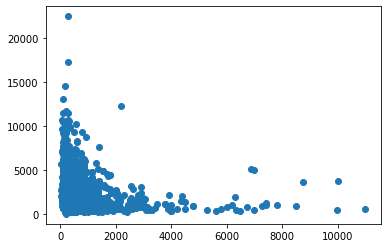

In [ ]:
plt.scatter(y=terrenos.PRECIO_USD_M2,x=terrenos.M2)
plt.show()

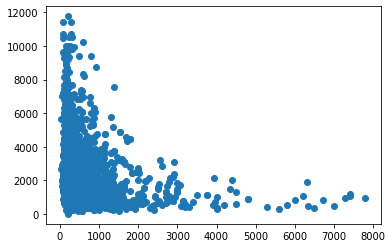

In [ ]:
terrenos = terrenos.drop(terrenos[(terrenos['PRECIO_USD_M2']>12250)].index)
terrenos = terrenos.drop(terrenos[(terrenos['M2']>8000)].index)
terrenos = terrenos.drop(terrenos[(terrenos['PRECIO_USD_M2']>4000) & (terrenos['M2']>6000)].index)
terrenos.reset_index()

plt.scatter(y = terrenos.PRECIO_USD_M2, x = terrenos.M2)
plt.show()

# Feature Engineering: crear nuevas features
Observamos que la columna "BARRIO" describe a cada registro (terreno) discriminado por el barrio en el que se ubica. Con el countplot de seaborn observamos la cantidad de registros que hay de cada barrio en esta columna. 

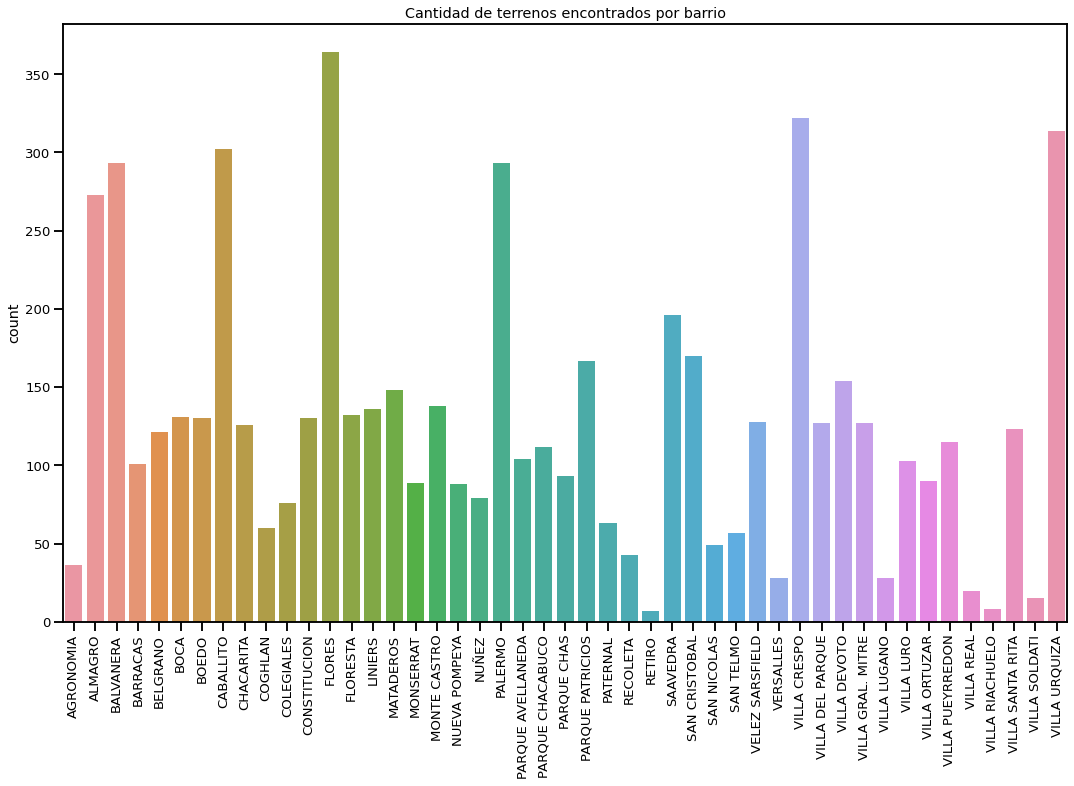

In [ ]:
terrenosporbarrio = terrenos.sort_values('BARRIO')
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(18,11))
sns.countplot(terrenosporbarrio.BARRIO.values)
plt.title("Cantidad de terrenos encontrados por barrio")
plt.xticks(rotation=90)
plt.show()

Observamos lo mismo para la columna "COMUNA" describe a cada registro (terreno) discriminado por la comuna en el que se ubica. Con el countplot de seaborn lo observamos de la misma manera que con los barrios.

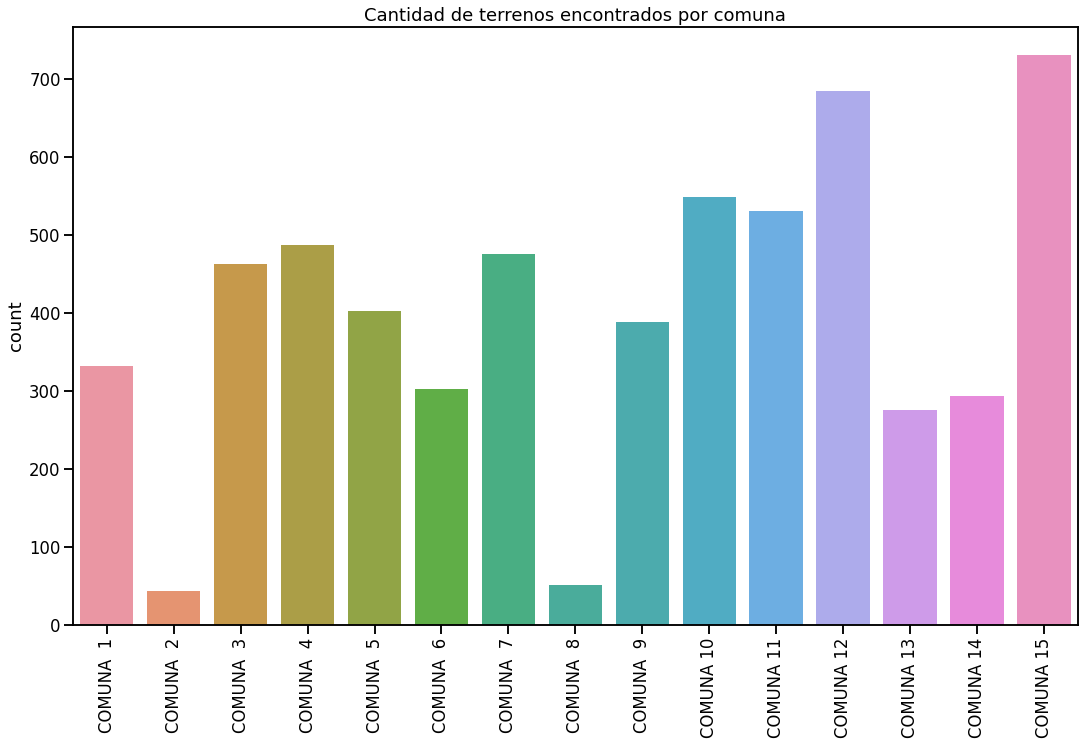

In [ ]:
terrenosporcomuna = terrenos.sort_values('COMUNA')
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(18,11))
sns.countplot(terrenosporcomuna.COMUNA.values)
plt.title("Cantidad de terrenos encontrados por comuna")
plt.xticks(rotation=90)
plt.show()

## Creacion de dummies
Nos servira crear dummie features de esta columna para poder considerar a cada barrio como una feature que esta "activada o desactivada" con 0 o 1.

**Feature "Barrio"**: queremos crear features que caractericen a la ubicacion por barrios. Para eso ralizaremos una transformacion de dummies con la columna "BARRIOS" utilizando la función "get_dummies" de pandas.

In [ ]:
#guardamos los resultados de get_dummies en un nuevo dataframe "barrios"
barrios = pd.get_dummies(terrenos.BARRIO)
barrios.head(3)

,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BELGRANO,BOCA,BOEDO,CABALLITO,CHACARITA,COGHLAN,COLEGIALES,CONSTITUCION,FLORES,FLORESTA,LINIERS,MATADEROS,MONSERRAT,MONTE CASTRO,NUEVA POMPEYA,NUÑEZ,PALERMO,PARQUE AVELLANEDA,PARQUE CHACABUCO,PARQUE CHAS,PARQUE PATRICIOS,PATERNAL,RECOLETA,RETIRO,SAAVEDRA,SAN CRISTOBAL,SAN NICOLAS,SAN TELMO,VELEZ SARSFIELD,VERSALLES,VILLA CRESPO,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Por medio del comando "pd.concat() concatenamos las tablas "terrenos" y "barrios" generando un nuevo dataframe llamado "terrenos_barrios".

In [ ]:
# aplicamos pd.concat() para unir ambos dataframes por columnas (axis = 1)
terrenos_barrios = pd.concat([terrenos, barrios], axis = 1)
terrenos_barrios.head(3)

,LONGITUD,LATITUD,CALLE,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,BARRIO,COMUNA,EST_EDU,ESP_VERD,OF_GASTR,ESP_CULT,CANT_DEL,EST_BICI,ACC_SUBTE,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BELGRANO,BOCA,BOEDO,CABALLITO,CHACARITA,COGHLAN,COLEGIALES,CONSTITUCION,FLORES,FLORESTA,LINIERS,MATADEROS,MONSERRAT,MONTE CASTRO,NUEVA POMPEYA,NUÑEZ,PALERMO,PARQUE AVELLANEDA,PARQUE CHACABUCO,PARQUE CHAS,PARQUE PATRICIOS,PATERNAL,RECOLETA,RETIRO,SAAVEDRA,SAN CRISTOBAL,SAN NICOLAS,SAN TELMO,VELEZ SARSFIELD,VERSALLES,VILLA CRESPO,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,-58.455627,-34.553169,11 DE SEPTIEMBRE DE 1888,2700,381.0,1150000.0,3018.372703,BELGRANO,COMUNA 13,104,52,71,111,4172,10,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-58.457136,-34.551182,11 DE SEPTIEMBRE DE 1888,2900,200.0,360000.0,1800.000000,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-58.462965,-34.543213,11 DE SEPTIEMBRE DE 1888,3900,493.0,1000000.0,2028.397566,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Feature "Comuna"**: queremos crear features que caractericen a la ubicacion por comunas. Para eso ralizaremos una transformacion de dummies con la columna "COMUNA" utilizando la función "get_dummies" de pandas.

In [ ]:
#guardamos los resultados de get_dummies en un nuevo dataframe "comunas"
comunas = pd.get_dummies(terrenos.COMUNA)
comunas.head(3)

,COMUNA 1,COMUNA 2,COMUNA 3,COMUNA 4,COMUNA 5,COMUNA 6,COMUNA 7,COMUNA 8,COMUNA 9,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA 13,COMUNA 14,COMUNA 15
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Por medio del comando "pd.concat() concatenamos las tablas "terrenos" y "comunas" generando un nuevo dataframe llamado "terrenos_comunas".

In [ ]:
# aplicamos pd.concat() para unir ambos dataframes por columnas (axis = 1)
terrenos_comunas = pd.concat([terrenos, comunas], axis = 1)
terrenos_comunas.head(3)

,LONGITUD,LATITUD,CALLE,NUMERO,M2,PRECIO_USD,PRECIO_USD_M2,BARRIO,COMUNA,EST_EDU,ESP_VERD,OF_GASTR,ESP_CULT,CANT_DEL,EST_BICI,ACC_SUBTE,COMUNA 1,COMUNA 2,COMUNA 3,COMUNA 4,COMUNA 5,COMUNA 6,COMUNA 7,COMUNA 8,COMUNA 9,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA 13,COMUNA 14,COMUNA 15
0,-58.455627,-34.553169,11 DE SEPTIEMBRE DE 1888,2700,381.0,1150000.0,3018.372703,BELGRANO,COMUNA 13,104,52,71,111,4172,10,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-58.457136,-34.551182,11 DE SEPTIEMBRE DE 1888,2900,200.0,360000.0,1800.000000,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-58.462965,-34.543213,11 DE SEPTIEMBRE DE 1888,3900,493.0,1000000.0,2028.397566,NUÑEZ,COMUNA 13,52,12,28,35,1876,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Barrio vs Precio USD M2

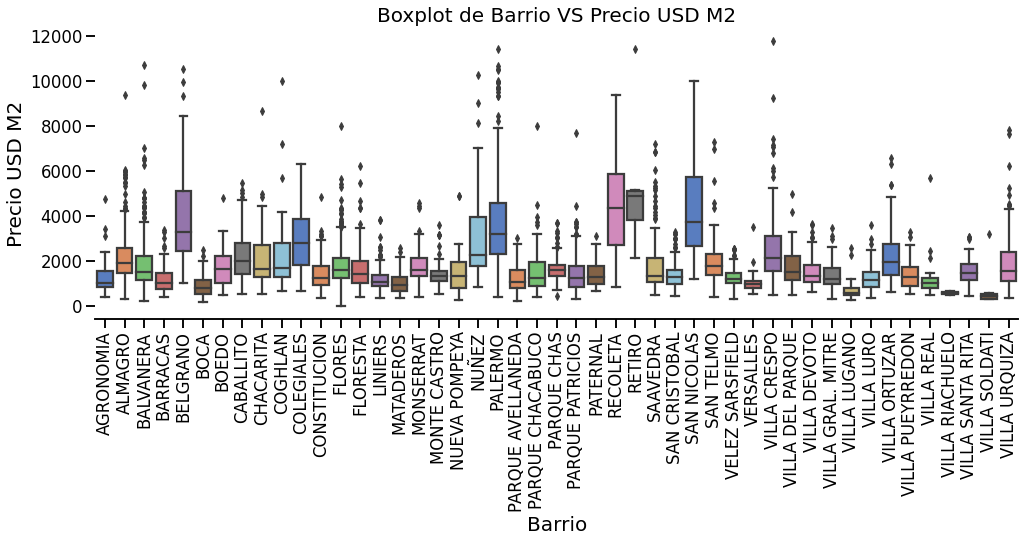

In [ ]:
g = sns.catplot(x="BARRIO",y="PRECIO_USD_M2",
                data=terrenosporbarrio, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Barrio",size = 20)
plt.ylabel("Precio USD M2",size = 20)
plt.title('Boxplot de Barrio VS Precio USD M2',size = 20)
plt.show()

# Comuna vs Precio USD M2

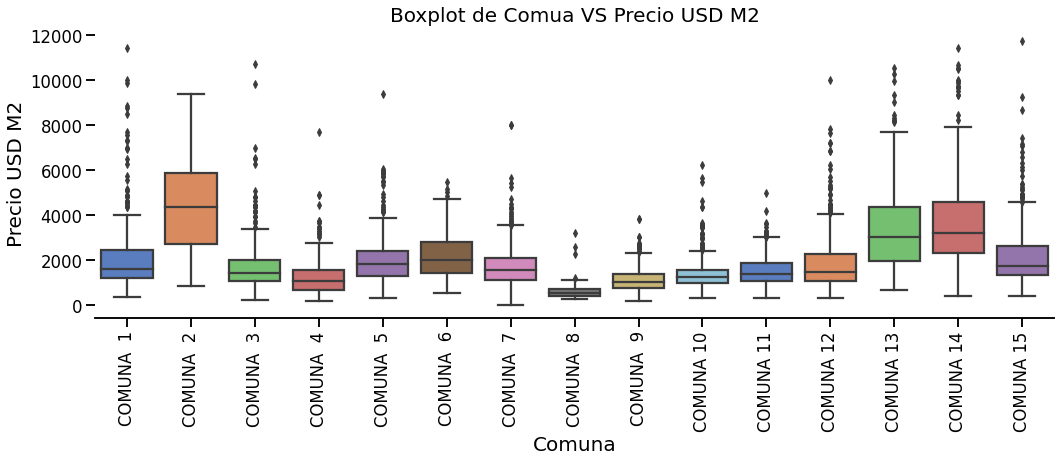

In [ ]:
g = sns.catplot(x="COMUNA",y="PRECIO_USD_M2",
                data=terrenosporcomuna, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Comuna",size = 20)
plt.ylabel("Precio USD M2",size = 20)
plt.title('Boxplot de Comua VS Precio USD M2',size = 20)
plt.show()

# Distribucion de precios por terreno

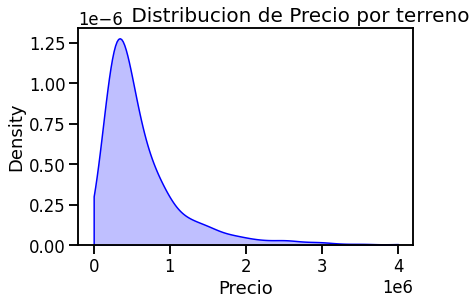

In [ ]:
#Plot Precio
sns.kdeplot(terrenos.PRECIO_USD, color="b", shade = True, clip=(0,4000000))
plt.xlabel("Precio")
plt.title('                 Distribucion de Precio por terreno',size = 20)
plt.show()


# Distribucion de precios por M2

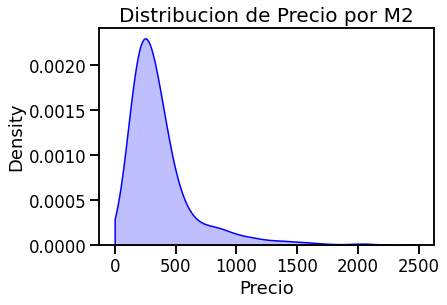

In [ ]:
#Plot Precio
sns.kdeplot(terrenos.M2, color="b", shade = True, clip=(0,2500))
plt.xlabel("Precio")
plt.title('Distribucion de Precio por M2',size = 20)
plt.show()

## Distribucion de terrenos geograficamente

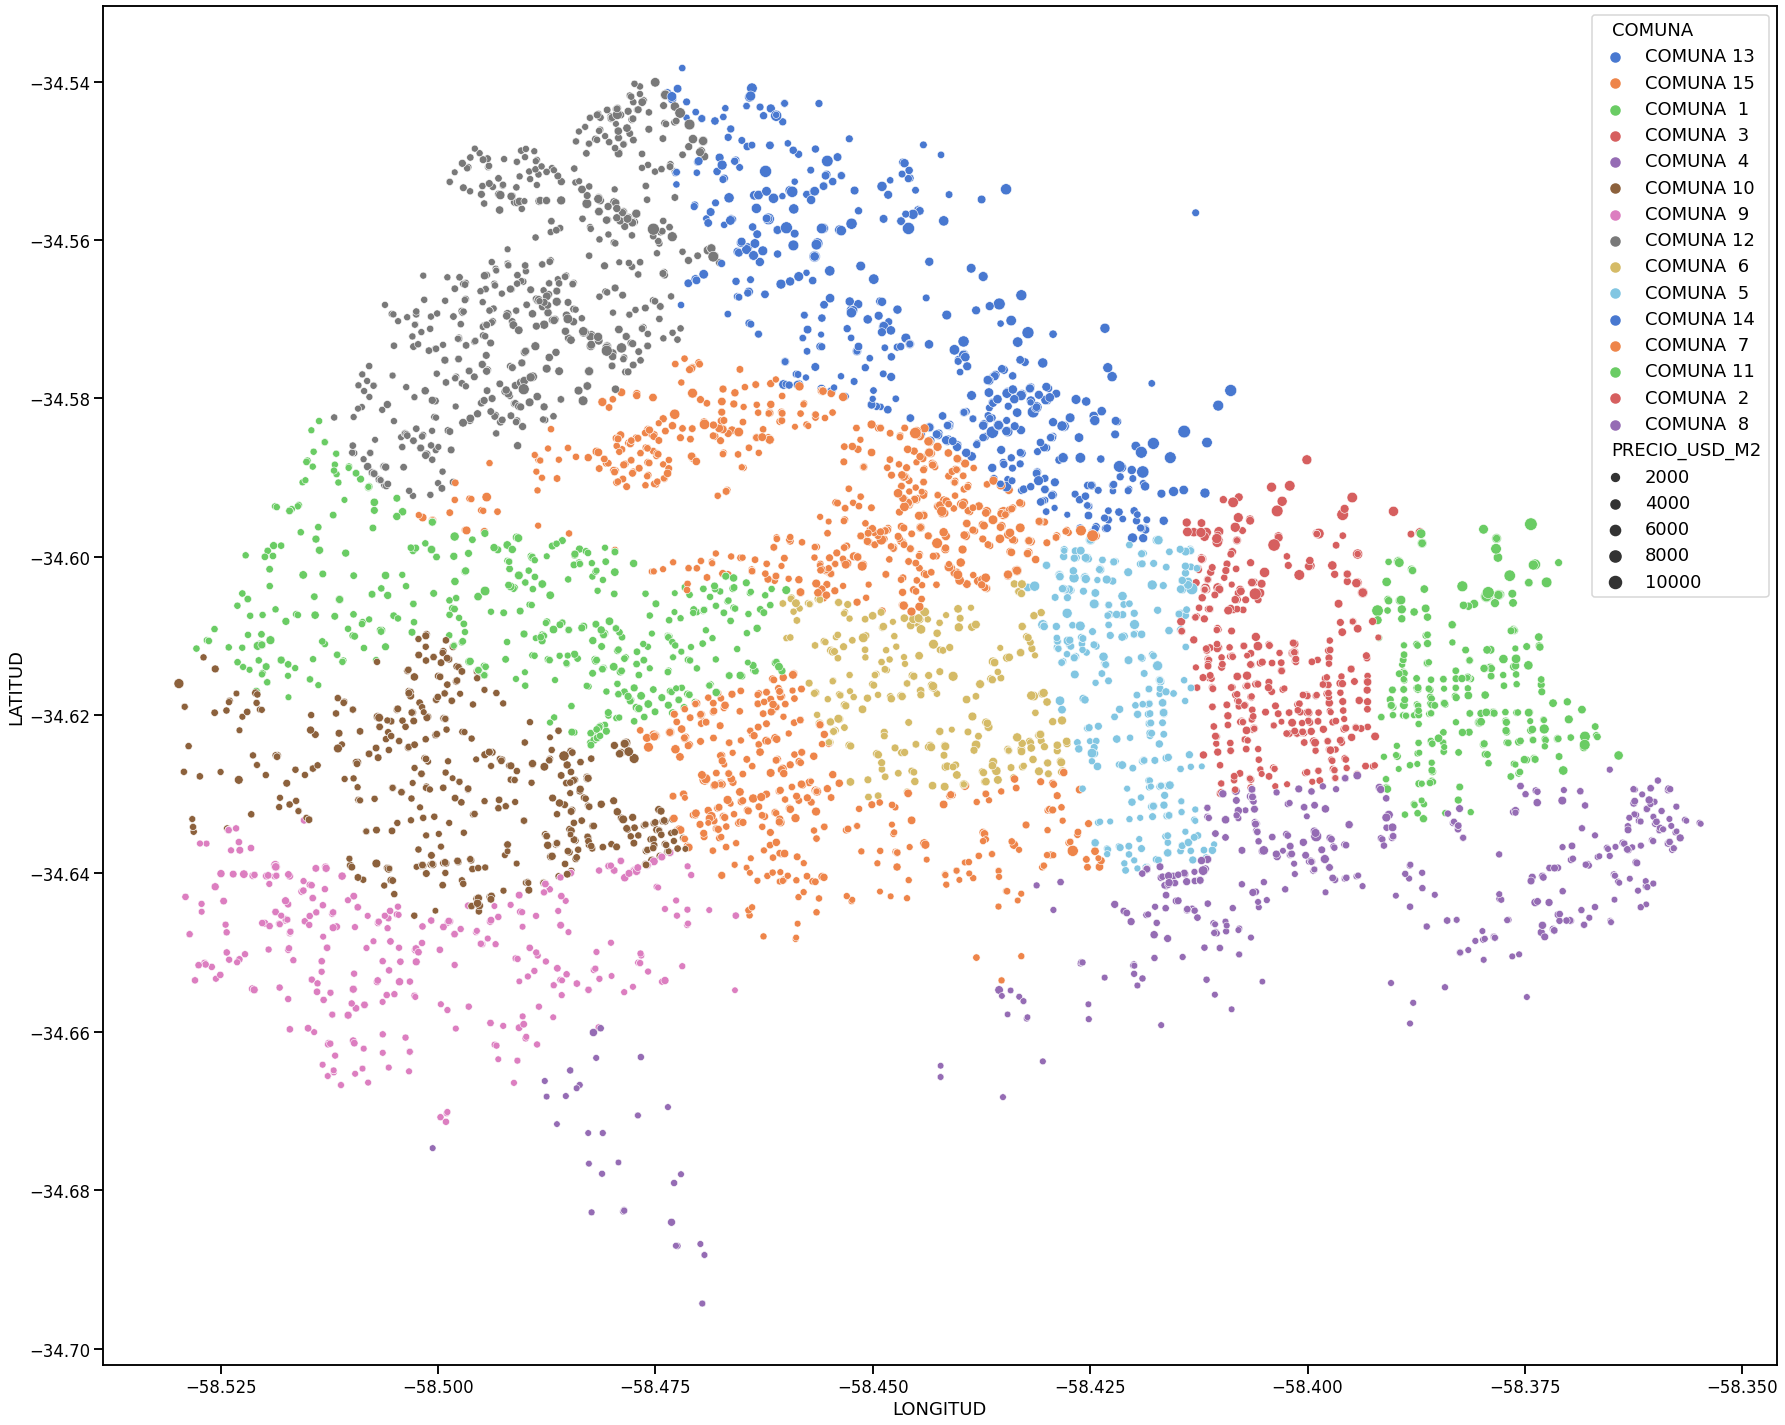

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(30,25))
sns.scatterplot(x=terrenos.LONGITUD,y=terrenos.LATITUD,hue=terrenos.COMUNA,palette='muted',data=terrenos,size=terrenos.PRECIO_USD_M2)
plt.show()

### Analisis de correlacion de variables

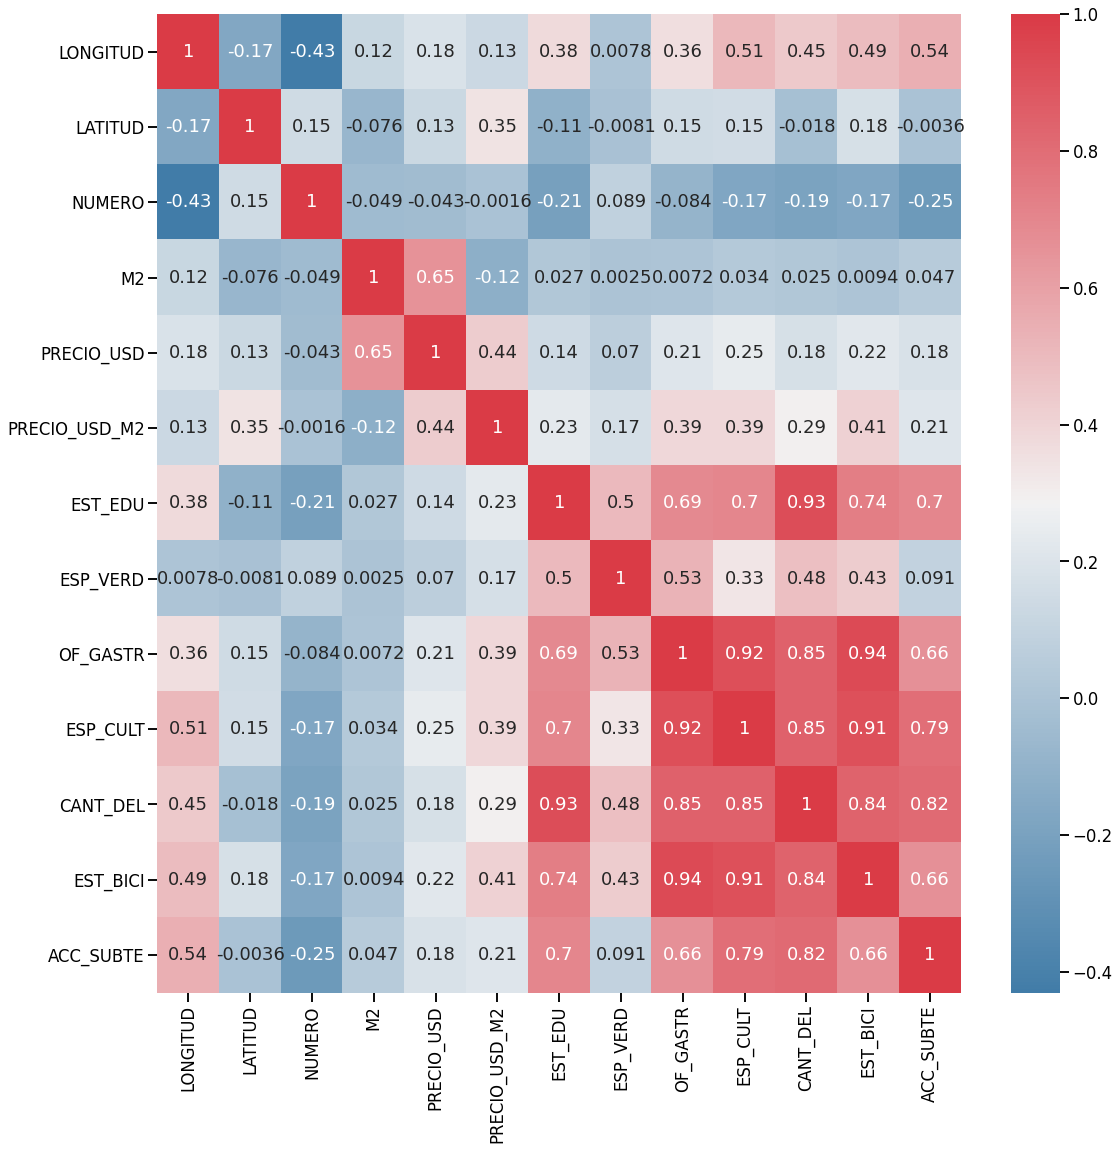

In [ ]:
corrmat = terrenos.corr()

f, ax = plt.subplots(figsize=(18,18))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [ ]:
corrmat = terrenos_barrios.corr()

f, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

Output hidden; open in https://colab.research.google.com to view.

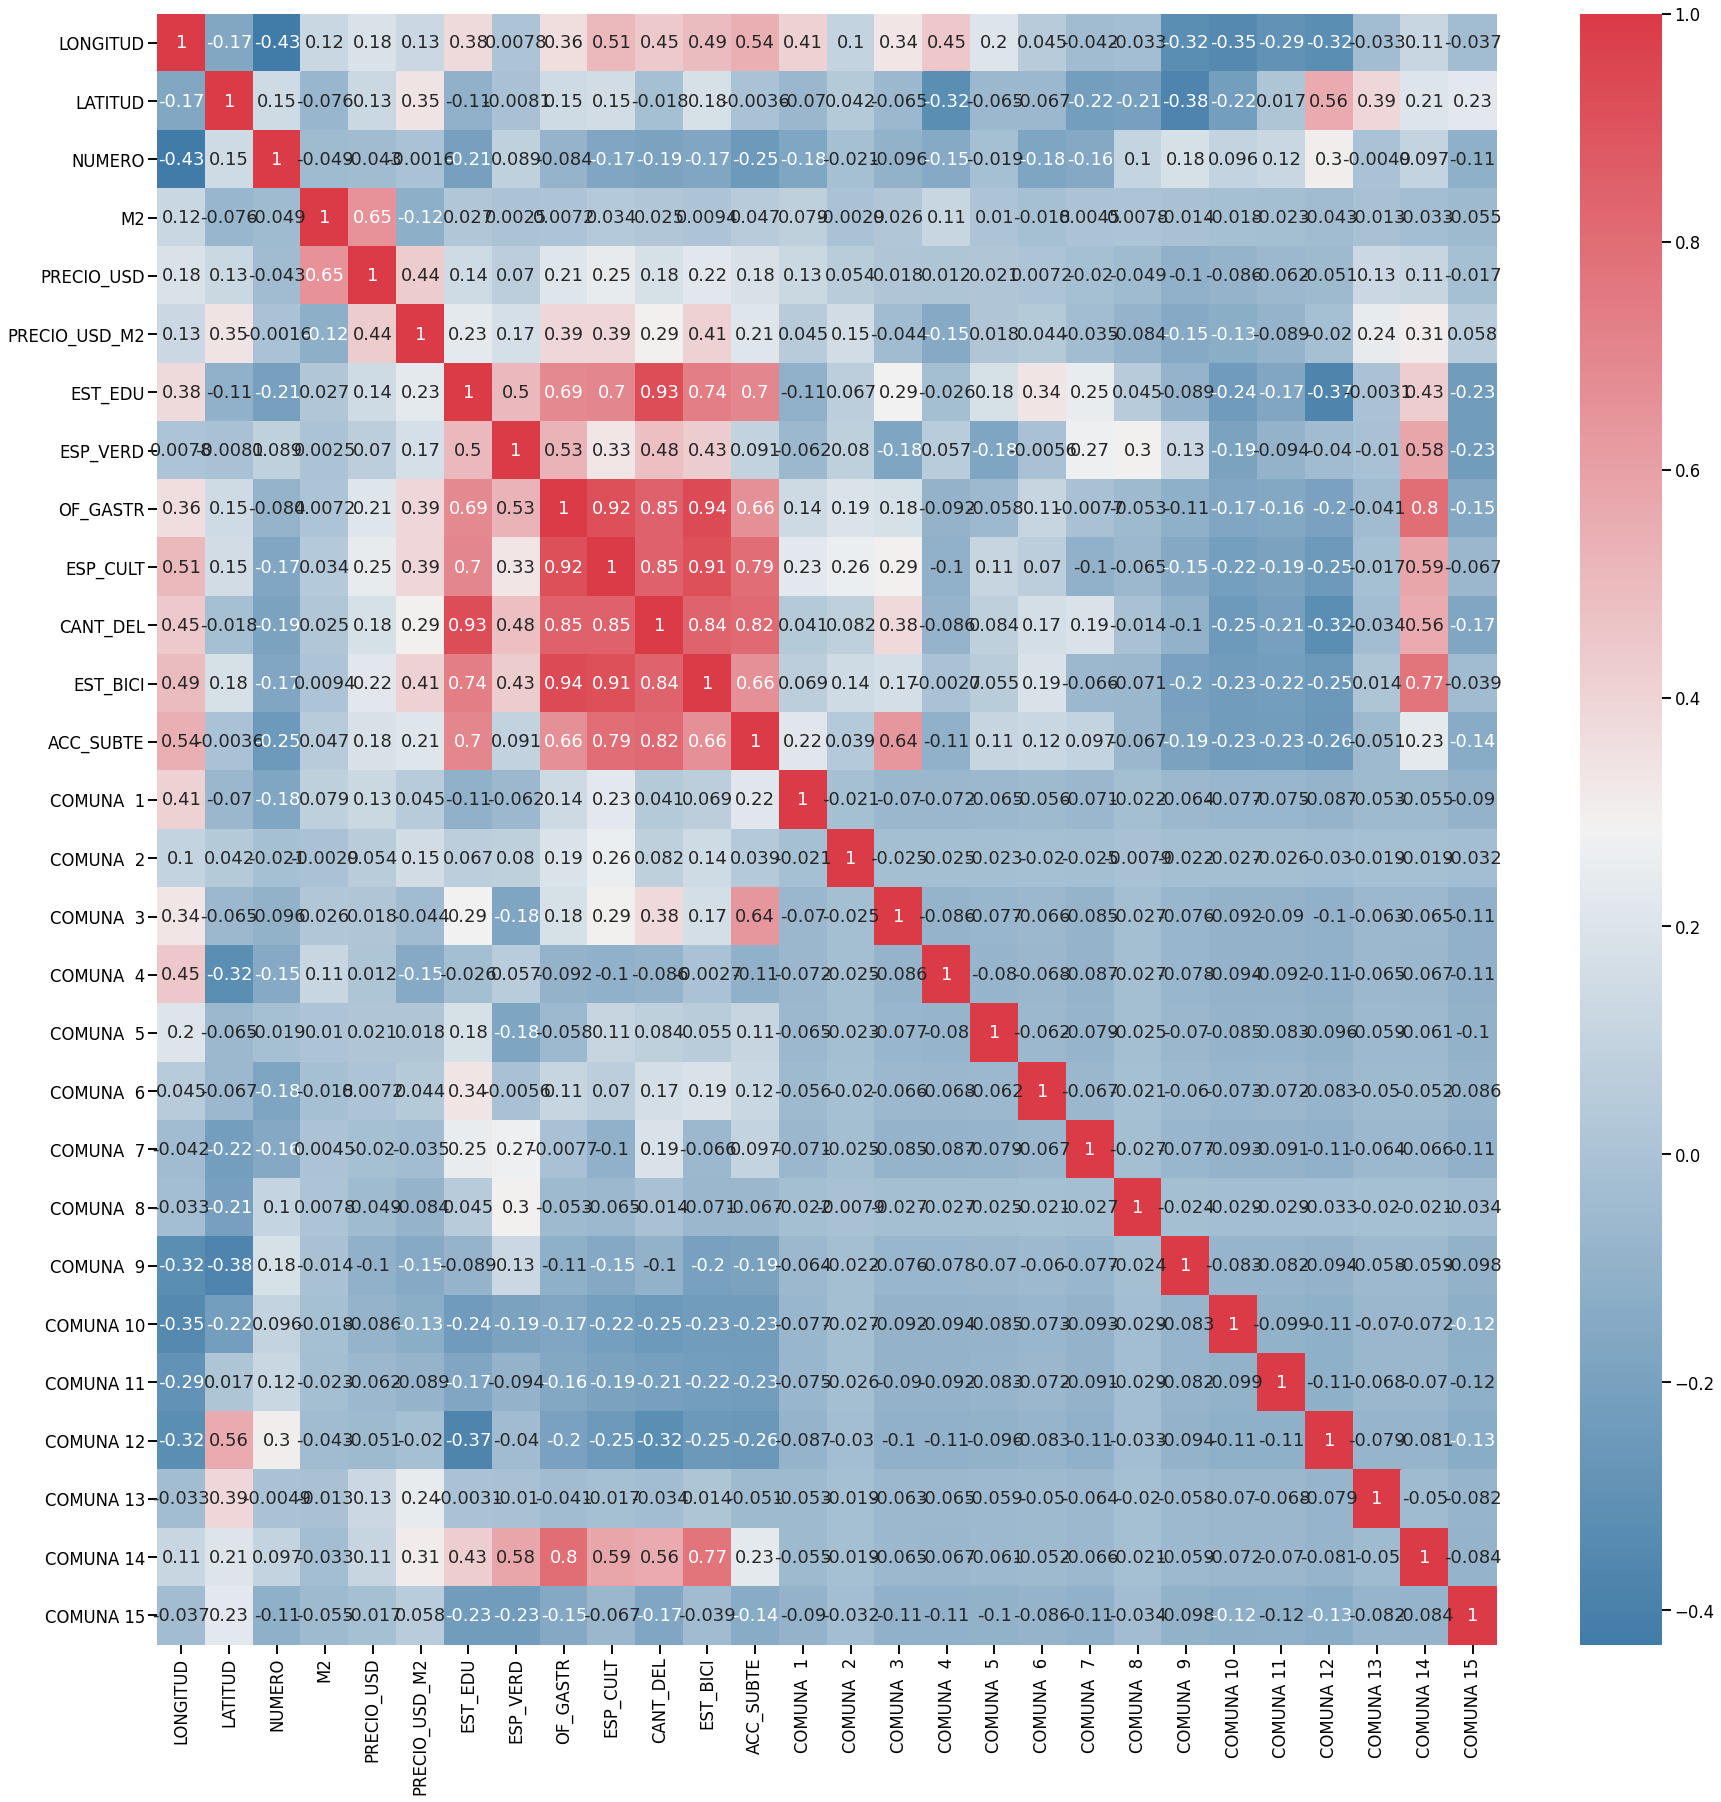

In [ ]:
corrmat = terrenos_comunas.corr()

f, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

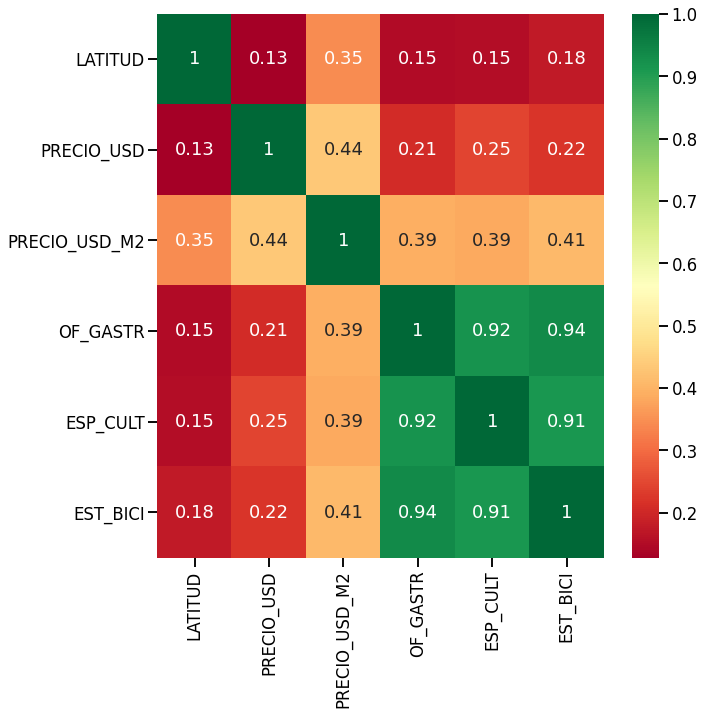

In [ ]:
# most correlated features
corrmat = terrenos.corr()
top_corr_features = corrmat.index[abs(corrmat["PRECIO_USD_M2"])>0.3]
plt.figure(figsize=(10,10))
g = sns.heatmap(terrenos[top_corr_features].corr(),annot=True,cmap="RdYlGn")

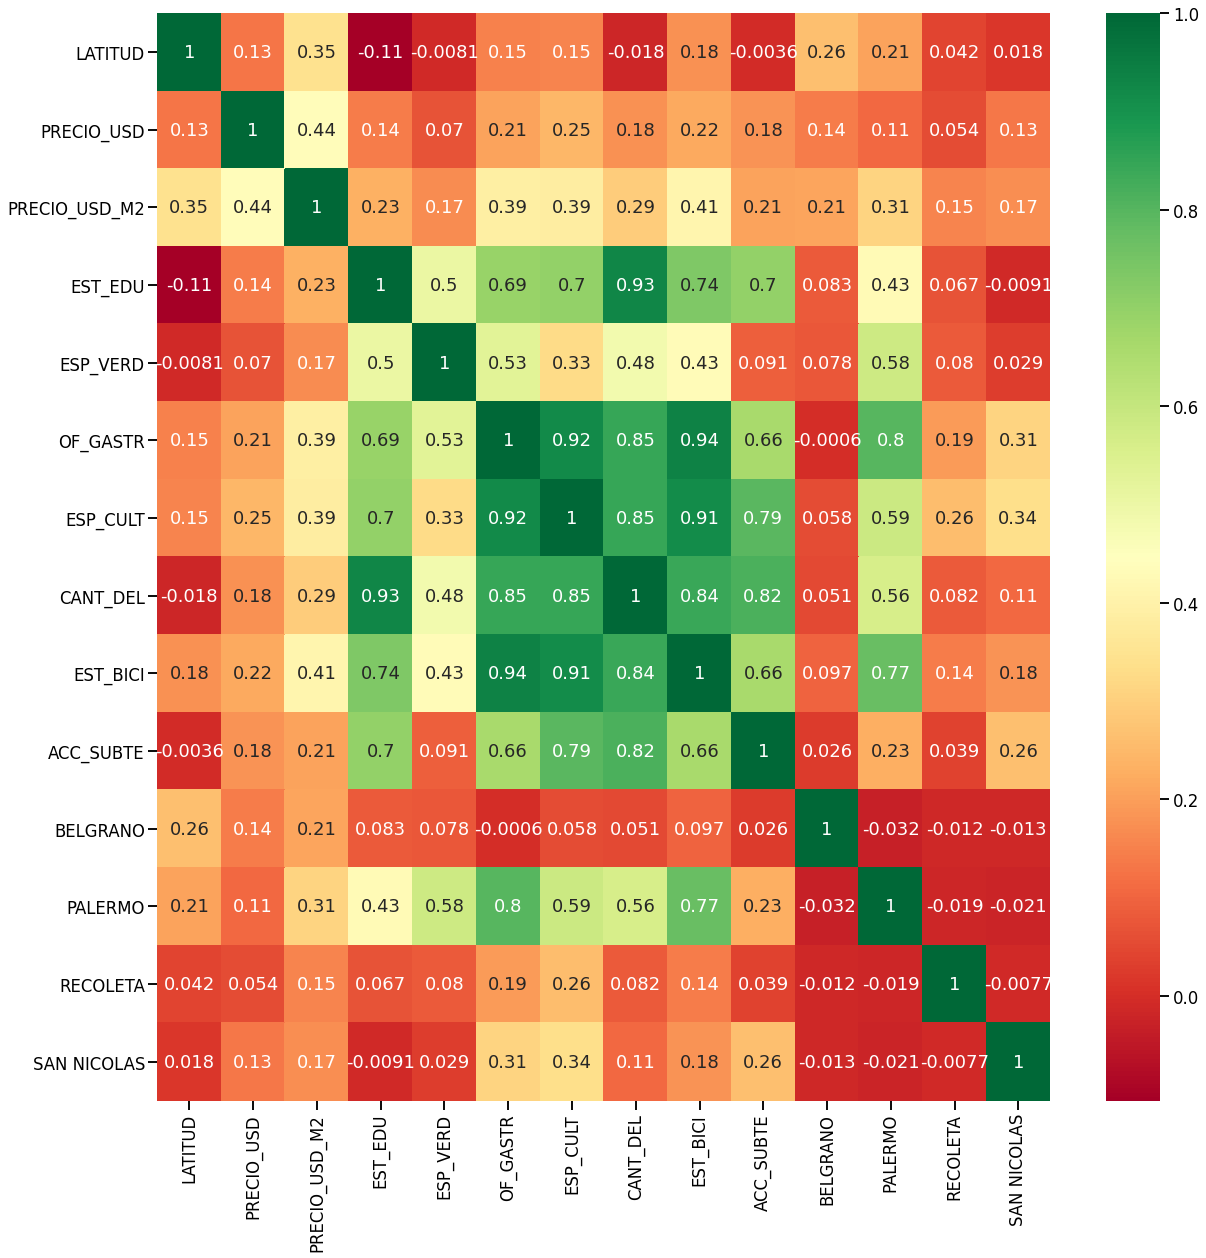

In [ ]:
# most correlated features
corrmat = terrenos_barrios.corr()
top_corr_features = corrmat.index[abs(corrmat["PRECIO_USD_M2"])>=0.15]
plt.figure(figsize=(20,20))
g = sns.heatmap(terrenos_barrios[top_corr_features].corr(),annot=True,cmap="RdYlGn")

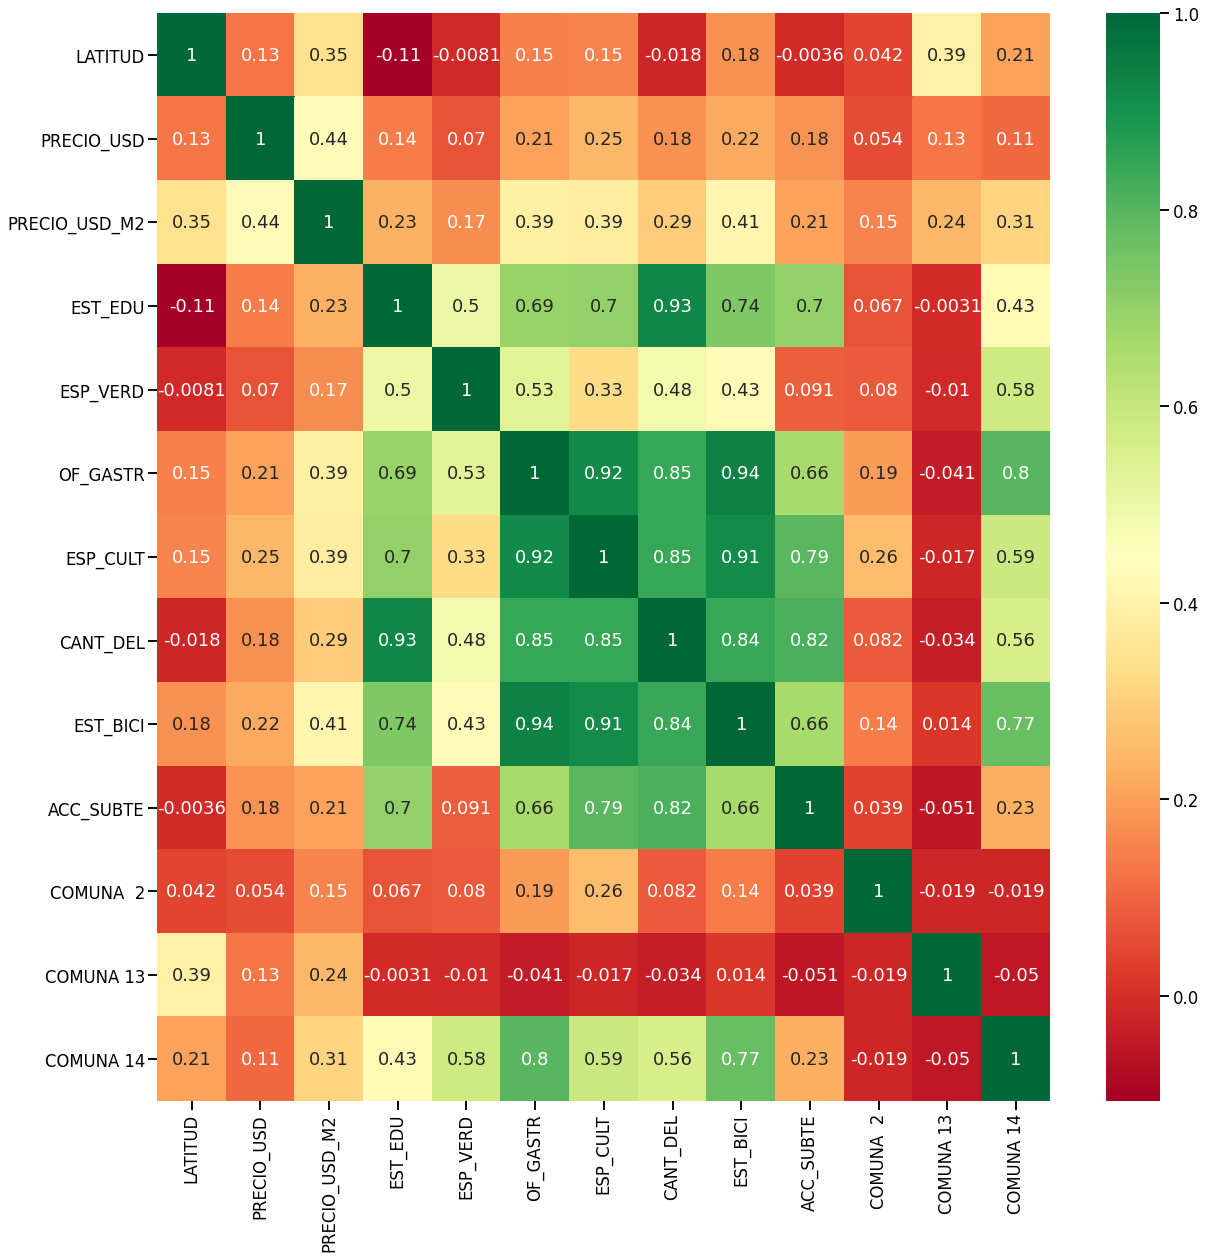

In [ ]:
# most correlated features
corrmat = terrenos_comunas.corr()
top_corr_features = corrmat.index[abs(corrmat["PRECIO_USD_M2"])>=0.15]
plt.figure(figsize=(20,20))
g = sns.heatmap(terrenos_comunas[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
y_o = terrenos.PRECIO_USD_M2
y_b = terrenos_barrios.PRECIO_USD_M2
y_c = terrenos_comunas.PRECIO_USD_M2

x_o = terrenos.drop(columns=['CALLE','NUMERO','PRECIO_USD','PRECIO_USD_M2','BARRIO','COMUNA'])
x_b = terrenos_barrios.drop(columns=['CALLE','NUMERO','PRECIO_USD','PRECIO_USD_M2','BARRIO','COMUNA'])
x_c = terrenos_comunas.drop(columns=['CALLE','NUMERO','PRECIO_USD','PRECIO_USD_M2','BARRIO','COMUNA'])

print(x_o.shape,x_b.shape,x_c.shape,y_o.shape,y_b.shape,y_c.shape)

(6009, 10) (6009, 57) (6009, 25) (6009,) (6009,) (6009,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_o)
x_o_scal = scaler.transform(x_o)
print(x_o_scal.shape)

scaler = StandardScaler().fit(x_b)
x_b_scal = scaler.transform(x_b)
print(x_b_scal.shape)

scaler = StandardScaler().fit(x_c)
x_c_scal = scaler.transform(x_c)
print(x_c_scal.shape)

(6009, 10)
(6009, 57)
(6009, 25)


(6009, 5)


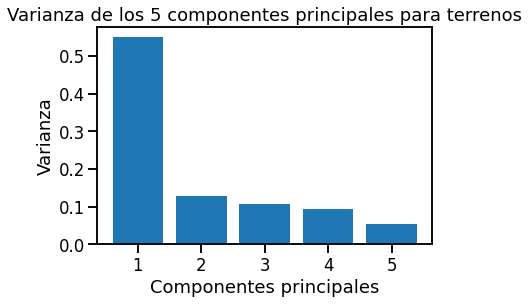

(6009, 5)


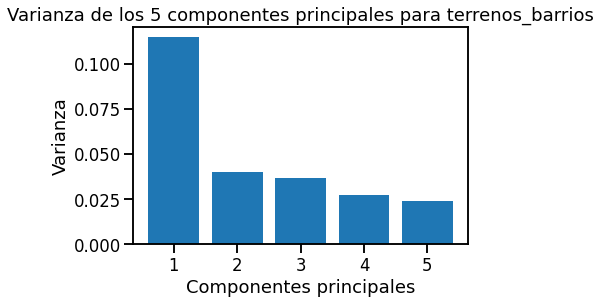

(6009, 5)


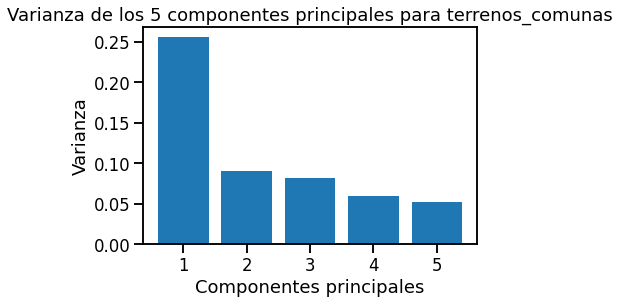

In [ ]:
from sklearn.decomposition import PCA
# Defino la cantidad de componentes del PCA y el pca
n_comps = 5
pca = PCA(n_components= n_comps)

# fit_transform del PCA a los datos y obtengo autovalores y muestro shape
xpca_o = pd.DataFrame(pca.fit_transform(x_o_scal))
eigenvalues_o = pca.explained_variance_ratio_
print(xpca_o.shape)

components = range(1,n_comps + 1)
plt.bar(components,eigenvalues_o)
plt.xticks(components)
plt.title('Varianza de los ' + str(n_comps)+' componentes principales para terrenos')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza')
plt.show()

xpca_b = pd.DataFrame(pca.fit_transform(x_b_scal))
eigenvalues_b = pca.explained_variance_ratio_
print(xpca_b.shape)

components = range(1,n_comps + 1)
plt.bar(components,eigenvalues_b)
plt.xticks(components)
plt.title('Varianza de los ' + str(n_comps)+' componentes principales para terrenos_barrios')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza')
plt.show()

xpca_c = pd.DataFrame(pca.fit_transform(x_c_scal))
eigenvalues_c = pca.explained_variance_ratio_
print(xpca_c.shape)

components = range(1,n_comps + 1)
plt.bar(components,eigenvalues_c)
plt.xticks(components)
plt.title('Varianza de los ' + str(n_comps)+' componentes principales para terrenos_comunas')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza')
plt.show()

In [ ]:
#xpca_Q1 = xpca.loc[y_o < terrenos.PRECIO_USD_M2.quantile(0.25)]
#xpca_Q4 = xpca.loc[y > terrenos.PRECIO_USD_M2.quantile(0.75)]
#xpca_QA = xpca.loc[y < terrenos.PRECIO_USD_M2.quantile(0.50)]
#xpca_QB = xpca.loc[y > terrenos.PRECIO_USD_M2.quantile(0.50)]
#xpca_Q2 = xpca_QA.loc[y > terrenos.PRECIO_USD_M2.quantile(0.25)]
#xpca_Q3 = xpca_QB.loc[y < terrenos.PRECIO_USD_M2.quantile(0.75)]

#sns.set_context("talk", font_scale=0.7)
#plt.figure(figsize=(9,6))
#plt.scatter(xpca_Q1.loc[:,0],xpca_Q1.loc[:,1], alpha = 0.7, label = 'Q1')
#plt.scatter(xpca_Q2.loc[:,0],xpca_Q2.loc[:,1], alpha = 0.7, label = 'Q2')
#plt.scatter(xpca_Q3.loc[:,0],xpca_Q3.loc[:,1], alpha = 0.7, label = 'Q3')
#plt.scatter(xpca_Q4.loc[:,0],xpca_Q4.loc[:,1], alpha = 0.7, label = 'Q4')
#plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
#plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
#plt.title('Principal Component Analysis')
#plt.legend(loc='upper right')
#plt.show()

In [ ]:
# vamos a visualizar en 3d
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xpca_Q1.loc[:,0],xpca_Q1.loc[:,1],xpca_Q1.loc[:,2], c='blue')
#ax.scatter(xpca_Q2.loc[:,0],xpca_Q2.loc[:,1],xpca_Q2.loc[:,2], c='yellow')
#ax.scatter(xpca_Q3.loc[:,0],xpca_Q3.loc[:,1],xpca_Q3.loc[:,2], c='green')
#ax.scatter(xpca_Q4.loc[:,0],xpca_Q4.loc[:,1],xpca_Q4.loc[:,2], c='red')
#ax.set_xlabel('P. Comp. 1')
#ax.set_ylabel('P. Comp. 2')
#ax.set_zlabel('P. Comp. 3')
#plt.show()

# Machine Learning

In [ ]:
#importo las librerias necesarias para aplicar modelos de regresión.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Dividir Train y Set

In [ ]:
#separamos set de entrenamiento y testeo
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o,y_o, test_size=0.4, random_state=1)
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b,y_b, test_size=0.4, random_state=1)
x_c_train, x_c_test, y_c_train, y_c_test = train_test_split(x_c,y_c, test_size=0.4, random_state=1)

In [ ]:
print(x_o_train.shape,x_o_test.shape,y_o_train.shape,y_o_test.shape)
print(x_b_train.shape,x_b_test.shape,y_b_train.shape,y_b_test.shape)
print(x_c_train.shape,x_c_test.shape,y_c_train.shape,y_c_test.shape)

(3605, 10) (2404, 10) (3605,) (2404,)
(3605, 57) (2404, 57) (3605,) (2404,)
(3605, 25) (2404, 25) (3605,) (2404,)


### Standar Scaler

In [ ]:
# escalo la x_train (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(x_o_train)
x_o_train_scal = scaler.transform(x_o_train)
x_o_test_scal = scaler.transform(x_o_test)
print(x_o_train_scal.shape,x_o_test_scal.shape)

scaler = preprocessing.StandardScaler().fit(x_b_train)
x_b_train_scal = scaler.transform(x_b_train)
x_b_test_scal = scaler.transform(x_b_test)
print(x_b_train_scal.shape,x_b_test_scal.shape)

scaler = preprocessing.StandardScaler().fit(x_c_train)
x_c_train_scal = scaler.transform(x_c_train)
x_c_test_scal = scaler.transform(x_c_test)
print(x_c_train_scal.shape,x_c_test_scal.shape)

(3605, 10) (2404, 10)
(3605, 57) (2404, 57)
(3605, 25) (2404, 25)


## Cross Validation & Hyperparamter

### Linear Regression

In [ ]:
#defino el modelo a entrenar.
lr = LinearRegression()

In [ ]:
#defino los parámetros a validar en cv.
parameters_lr = {'fit_intercept' : [False, True]}
n_folds = 5

In [ ]:
#valido los mejores parámetros en cv.
lr_model_o = GridSearchCV(lr, param_grid=parameters_lr, cv=n_folds, refit=True, scoring="neg_mean_squared_error")
lr_model_b = GridSearchCV(lr, param_grid=parameters_lr, cv=n_folds, refit=True, scoring="neg_mean_squared_error")
lr_model_c = GridSearchCV(lr, param_grid=parameters_lr, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [ ]:
#ajusto el modelo de regresión lineal utilizando el x_train_scal.
lr_model_o.fit(x_o_train_scal, y_o_train)
lr_model_b.fit(x_b_train_scal, y_b_train)
lr_model_c.fit(x_c_train_scal, y_c_train)
#mostramos los mejores parametros seleccionados y el score
print(lr_model_o.best_estimator_, "\n")
print(lr_model_o.best_params_, "\n")
print(lr_model_o.best_score_, "\n")

print(lr_model_b.best_estimator_, "\n")
print(lr_model_b.best_params_, "\n")
print(lr_model_b.best_score_, "\n")

print(lr_model_c.best_estimator_, "\n")
print(lr_model_c.best_params_, "\n")
print(lr_model_c.best_score_, "\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-1289521.9052529042 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-1174599.049339991 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-1216813.325659555 



In [ ]:
#obtengo las predicciones a partir de la utilización del modelo de lr con los mejóres parámetros.
y_o_pred_lr = lr_model_o.predict(x_o_test_scal)
y_b_pred_lr = lr_model_b.predict(x_b_test_scal)
y_c_pred_lr = lr_model_c.predict(x_c_test_scal)

In [ ]:
#calculo las métricas con las que compararé los modelos :R2, MSE,RMSE y MAE.
lr_model_o_r2 = r2_score(y_true=y_o_test, y_pred=y_o_pred_lr)
lr_model_o_mse = mean_squared_error(y_true=y_o_test, y_pred=y_o_pred_lr)
lr_model_o_rmse = lr_model_o_mse**(1/2)
lr_model_o_mae = mean_absolute_error(y_true=y_o_test, y_pred=y_o_pred_lr)

lr_model_b_r2 = r2_score(y_true=y_b_test, y_pred=y_b_pred_lr)
lr_model_b_mse = mean_squared_error(y_true=y_b_test, y_pred=y_b_pred_lr)
lr_model_b_rmse = lr_model_b_mse**(1/2)
lr_model_b_mae = mean_absolute_error(y_true=y_b_test, y_pred=y_b_pred_lr)

lr_model_c_r2 = r2_score(y_true=y_c_test, y_pred=y_c_pred_lr)
lr_model_c_mse = mean_squared_error(y_true=y_c_test, y_pred=y_c_pred_lr)
lr_model_c_rmse = lr_model_c_mse**(1/2)
lr_model_c_mae = mean_absolute_error(y_true=y_c_test, y_pred=y_c_pred_lr)

R2 score: 0.261275
MAE: 1331480.889225
RMSE:1153.898128
MSE: 791.426573


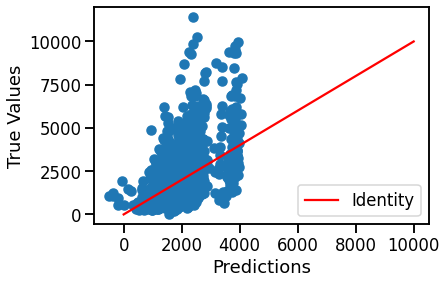

In [ ]:
#Vamos a plotear Predictions vs True values
plt.scatter(y_o_pred_lr, y_o_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {lr_model_o_r2:.6f}')
print(f'MAE: {lr_model_o_mse:.6f}')
print(f'RMSE:{lr_model_o_rmse:.6f}')
print(f'MSE: {lr_model_o_mae:.6f}')


R2 score: 0.349623
MAE: 1172241.659890
RMSE:1082.701094
MSE: 737.261813


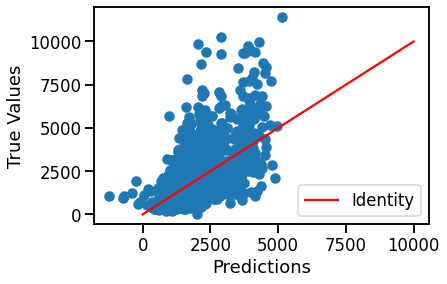

In [ ]:
plt.scatter(y_b_pred_lr, y_b_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {lr_model_b_r2:.6f}')
print(f'MAE: {lr_model_b_mse:.6f}')
print(f'RMSE:{lr_model_b_rmse:.6f}')
print(f'MSE: {lr_model_b_mae:.6f}')

R2 score: 0.303613
MAE: 1255171.102420
RMSE:1120.344189
MSE: 764.723875


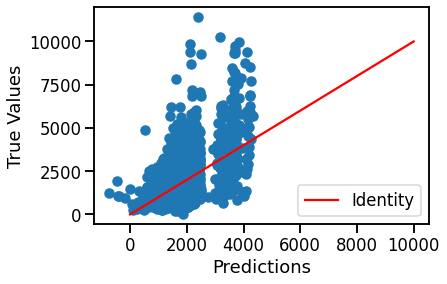

In [ ]:
plt.scatter(y_c_pred_lr, y_c_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {lr_model_c_r2:.6f}')
print(f'MAE: {lr_model_c_mse:.6f}')
print(f'RMSE:{lr_model_c_rmse:.6f}')
print(f'MSE: {lr_model_c_mae:.6f}')

### Ridge Regression

In [ ]:
#defino el modelo a entrenar.
rr=Ridge()

In [ ]:
#defino los parámetros a validar en cv.
lambdas = [37.1, 37.2, 37.3, 37.4, 37.5]
parameters_rr = {'alpha': lambdas}

In [ ]:
#valido los mejores parámetros en cv.
rr_model_o = GridSearchCV(rr, param_grid=parameters_rr,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
rr_model_b = GridSearchCV(rr, param_grid=parameters_rr,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
rr_model_c = GridSearchCV(rr, param_grid=parameters_rr,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [ ]:
#entrenamos
rr_model_o.fit(x_o_train_scal, y_o_train)
rr_model_b.fit(x_b_train_scal, y_b_train)
rr_model_c.fit(x_c_train_scal, y_c_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [37.1, 37.2, 37.3, 37.4, 37.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(rr_model_o.best_estimator_, "\n")
print(rr_model_o.best_params_, "\n")
print(rr_model_o.best_score_, "\n")

print(rr_model_b.best_estimator_, "\n")
print(rr_model_b.best_params_, "\n")
print(rr_model_b.best_score_, "\n")

print(rr_model_c.best_estimator_, "\n")
print(rr_model_c.best_params_, "\n")
print(rr_model_c.best_score_, "\n")

Ridge(alpha=37.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 37.1} 

-1289313.900790854 

Ridge(alpha=37.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 37.1} 

-1179159.9699521246 

Ridge(alpha=37.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 37.1} 

-1220103.4571452811 



In [ ]:
#obtengo las predicciones a partir de la utilización del modelo de rr con los mejóres parámetros.
y_o_pred_rr = rr_model_o.best_estimator_.predict(x_o_test_scal)
y_b_pred_rr = rr_model_b.best_estimator_.predict(x_b_test_scal)
y_c_pred_rr = rr_model_c.best_estimator_.predict(x_c_test_scal)

In [ ]:
#calculo las métricas con las que compararé los modelos :R2, MS,RMSE y MAE.
rr_model_o_r2 = r2_score(y_true=y_o_test, y_pred=y_o_pred_rr)
rr_model_o_mse = mean_squared_error(y_true=y_o_test, y_pred=y_o_pred_rr)
rr_model_o_rmse = rr_model_o_mse**(1/2)
rr_model_o_mae = mean_absolute_error(y_true=y_o_test, y_pred=y_o_pred_rr)

rr_model_b_r2 = r2_score(y_true=y_b_test, y_pred=y_b_pred_rr)
rr_model_b_mse = mean_squared_error(y_true=y_b_test, y_pred=y_b_pred_rr)
rr_model_b_rmse = rr_model_b_mse**(1/2)
rr_model_b_mae = mean_absolute_error(y_true=y_b_test, y_pred=y_b_pred_rr)

rr_model_c_r2 = r2_score(y_true=y_c_test, y_pred=y_c_pred_rr)
rr_model_c_mse = mean_squared_error(y_true=y_c_test, y_pred=y_c_pred_rr)
rr_model_c_rmse = rr_model_c_mse**(1/2)
rr_model_c_mae = mean_absolute_error(y_true=y_c_test, y_pred=y_c_pred_rr)

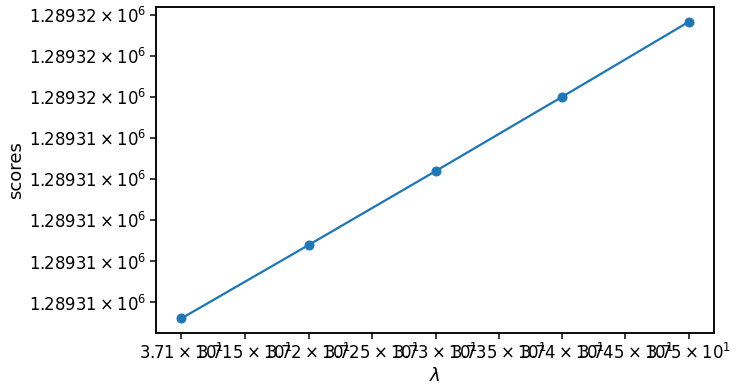

In [ ]:
# Plots
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in rr_model_o.cv_results_['params']]
fit_scores = rr_model_o.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

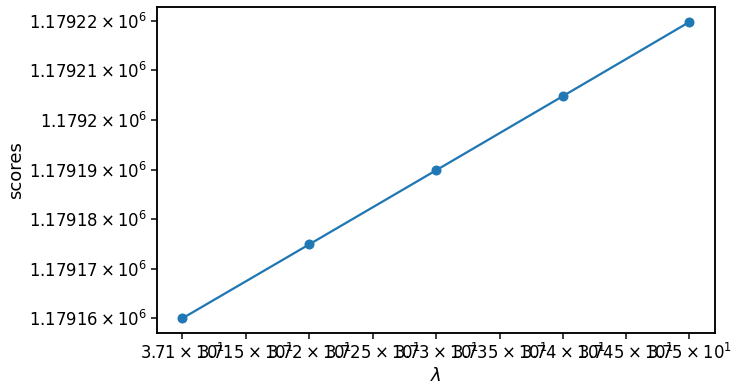

In [ ]:
# Plots
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in rr_model_b.cv_results_['params']]
fit_scores = rr_model_b.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

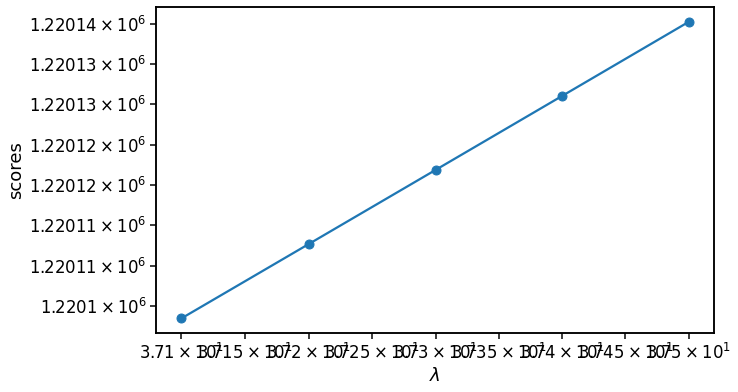

In [ ]:
# Plots
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in rr_model_c.cv_results_['params']]
fit_scores = rr_model_c.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

R2 score: 0.261134
MAE: 1331735.152363
RMSE:1154.008298
MSE: 790.845940


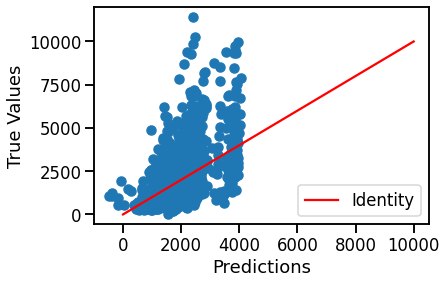

In [ ]:
plt.scatter(y_o_pred_rr, y_o_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {rr_model_o_r2:.6f}')
print(f'MAE: {rr_model_o_mse:.6f}')
print(f'RMSE:{rr_model_o_rmse:.6f}')
print(f'MSE: {rr_model_o_mae:.6f}')

R2 score: 0.342877
MAE: 1184401.336821
RMSE:1088.302043
MSE: 737.025688


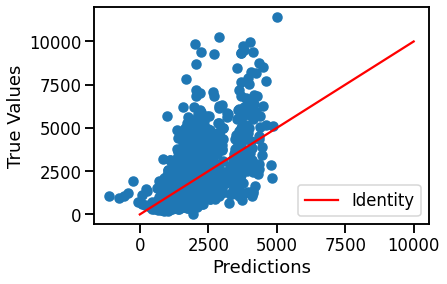

In [ ]:
plt.scatter(y_b_pred_rr, y_b_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {rr_model_b_r2:.6f}')
print(f'MAE: {rr_model_b_mse:.6f}')
print(f'RMSE:{rr_model_b_rmse:.6f}')
print(f'MSE: {rr_model_b_mae:.6f}')

R2 score: 0.302461
MAE: 1257247.017976
RMSE:1121.270270
MSE: 764.372653


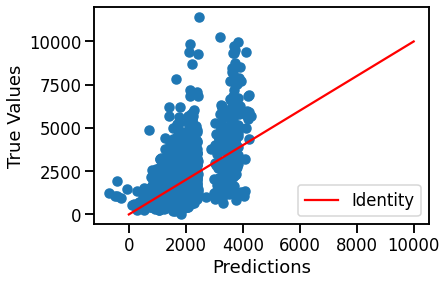

In [ ]:
plt.scatter(y_c_pred_rr, y_c_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {rr_model_c_r2:.6f}')
print(f'MAE: {rr_model_c_mse:.6f}')
print(f'RMSE:{rr_model_c_rmse:.6f}')
print(f'MSE: {rr_model_c_mae:.6f}')

### Support Vector Regression

In [ ]:
#defino el modelo a entrenar.
svr=SVR(max_iter=15000)

In [ ]:
#defino los parámetros a validar en cv.
parameters_svr = {'C' : [3175,3200,3225],'epsilon' : [201,202,203],'gamma':[6.7,6.8,6.9]}

In [ ]:
#valido los mejores parámetros en cv.
svr_model = GridSearchCV(svr, param_grid=parameters_svr,refit=True,cv=n_folds, scoring="neg_mean_squared_error",verbose=3, n_jobs=3)

In [ ]:
#entrenamos
svr_model.fit(x_b_train_scal, y_b_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=15000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [3175, 3200, 3225], 'epsilon': [201, 202, 203],
                         'gamma': [6.7, 6.8, 6.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(svr_model.best_estimator_, "\n")
print(svr_model.best_params_, "\n")
print(svr_model.best_score_, "\n")

SVR(C=3225, cache_size=200, coef0=0.0, degree=3, epsilon=203, gamma=6.7,
    kernel='rbf', max_iter=15000, shrinking=True, tol=0.001, verbose=False) 

{'C': 3225, 'epsilon': 203, 'gamma': 6.7} 

-984115.3471111485 



In [ ]:
#obtengo las predicciones a partir de la utilización del modelo de rr con los mejóres parámetros.
y_pred_svr = svr_model.best_estimator_.predict(x_b_test_scal)

In [ ]:
#calculo las métricas con las que compararé los modelos :R2, MSE y MAE.
svr_model_r2 = r2_score(y_true=y_b_test, y_pred=y_pred_svr)
svr_model_mse = mean_squared_error(y_true=y_b_test, y_pred=y_pred_svr)
svr_model_rmse = svr_model_mse**(1/2)
svr_model_mae = mean_absolute_error(y_true=y_b_test, y_pred=y_pred_svr)

R2 score: 0.435441
MAE: 1017562.882135
RMSE: 1008.743219
MSE: 623.955106


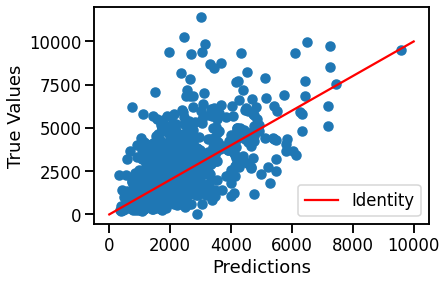

In [ ]:
plt.scatter(y_pred_svr, y_b_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_model_r2:.6f}')
print(f'MAE: {svr_model_mse:.6f}')
print(f'RMSE: {svr_model_rmse:.6f}')
print(f'MSE: {svr_model_mae:.6f}')

### KNN Regression

In [ ]:
#defino el modelo a entrenar.
knn=KNeighborsRegressor(weights="distance")

In [ ]:
#defino los parámetros a validar en cv.
parameters_k = np.arange(5,10,15)
parameters_knn = [{'n_neighbors': parameters_k}]

In [ ]:
#valido los mejores parámetros en cv.
knn_model = GridSearchCV(knn, param_grid=parameters_knn,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [ ]:
#entrenamos
knn_model.fit(x_b_train_scal, y_b_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([5])}], pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(knn_model.best_estimator_, "\n")
print(knn_model.best_params_, "\n")
print(knn_model.best_score_, "\n")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance') 

{'n_neighbors': 5} 

-943719.2155847527 



In [ ]:
#obtengo las predicciones a partir de la utilización del modelo de rr con los mejóres parámetros.
y_pred_knn = knn_model.predict(x_b_test_scal)

In [ ]:
#calculo las métricas con las que compararé los modelos : R2, MSE y MAE.
knn_model_r2 = r2_score(y_true=y_b_test, y_pred=y_pred_knn)
knn_model_mse = mean_squared_error(y_true=y_b_test, y_pred=y_pred_knn)
knn_model_rmse = knn_model_mse**(1/2)
knn_model_mae = mean_absolute_error(y_true=y_b_test, y_pred=y_pred_knn)

R2 score: 0.522206
MAE: 861177.104427
RMSE: 927.996285
MSE: 547.958489


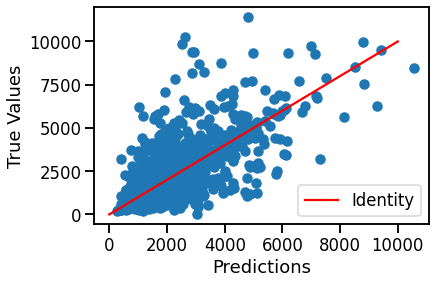

In [ ]:
plt.scatter(y_pred_knn, y_b_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {knn_model_r2:.6f}')
print(f'MAE: {knn_model_mse:.6f}')
print(f'RMSE: {knn_model_rmse:.6f}')
print(f'MSE: {knn_model_mae:.6f}')

## Selección del mejor modelo

In [ ]:
#construimos una matriz en la cual comparar las distintas métricas del modelo.
a = ['LR','RR','SVR','KNNR']
b = [lr_model_b_r2,rr_model_b_r2,svr_model_r2,knn_model_r2]
c = [lr_model_b_mse,rr_model_b_mse,svr_model_mse,knn_model_mse]
d = [lr_model_b_rmse,rr_model_b_rmse,svr_model_rmse,knn_model_rmse]
e = [lr_model_b_mae,rr_model_b_mae,svr_model_mae,knn_model_mae]
matriz = pd.DataFrame({'Modelo' : a,'R2' : b, 'MSE' : c, 'RMSE' : d, 'MAE' : e})
print("Comparación de modelos")
matriz

Comparación de modelos


,Modelo,R2,MSE,RMSE,MAE
0,LR,0.349623,1.172242e+06,1082.701094,737.261813
1,RR,0.342877,1.184401e+06,1088.302043,737.025688
2,SVR,0.435441,1.017563e+06,1008.743219,623.955106
3,KNNR,0.522206,8.611771e+05,927.996285,547.958489
